# Домашнее задание №2 по вычислительной математике
*Выполнил: Белиловский Иван, Б06-202*


## Задача №1
* Решить численно задачу о колебаниях в системе, где и возвращающая сила, и
коэффициент вязкого трения убывают со временем (уравнение Эйлера):
$$ \ddot{x} + 100 \frac{x}{t^2} = 0$$ 
где $ t\in[1;101]$, $~~x(1)=1, ~~ \dot{x}(1)=1$
* Найти точное решение системы. Будем искать точное решение в виде $x=t^{\alpha}$, где $\alpha\in \mathbb{C}$.
* Используя численные методы Эйлера (явный, неявный, с центральной точкой),
методы Дормана-Принса и трапеций, получить численные решения с шагом 0,1 для
$T = 1, 10, 100, 1000$. Объяснить полученные результаты. Уменьшить $\tau$ вдвое. Объяснить
полученные результаты.
* Исследовать методы трапеций и Дормана-Принса для данной задачи на
устойчивость. Получить априорно оценку для шагов, при которых метод устойчив.
Устойчив ли метод Эйлера с центральной точкой? Объяснить полученные с его
помощью результаты.

### Часть 1. Аналитическое решение:
Так как мы ищем решение в виде $x = t^{\alpha}$ $-$ подставим это выражение в исходное уравнение:
$$ \alpha(\alpha-1)t^{\alpha-2} + 100t^{\alpha-2} = 0 $$ 
так как это верно для любых $t\in[1;101]$ то получим уранение на $\alpha$:
$$ \alpha(\alpha-1) + 100 = 0 $$
Откуда решая уравнение однозначно находятся 2 корня:
$$ \alpha = \frac{1\pm i\sqrt{399}}{2} $$
Разобьёма $\alpha$ на 2 части -- действительную и комплексную: $\alpha_{12} = \frac12 \pm i\frac{\sqrt{399}}{2}$. Тогда решение уравнения в указанном выше виде:
$$
x(t) = \sqrt{t}\left(At^{i\frac{\sqrt{399}}{2}} + Bt^{-i\frac{\sqrt{399}}{2}}\right) = \sqrt{t}\left( Ae^{i\frac{\sqrt{399}}{2}\ln(t)} + Be^{-i\frac{\sqrt{399}}{2}\ln(t)}\right) = \sqrt{t}\left( C\cos\left(\frac{\sqrt{399}}{2}\ln(t)\right) + D\sin\left(\frac{\sqrt{399}}{2}\ln(t)\right)\right)
$$
Подставляя начальные условия $~~x(1)=1, ~~ \dot{x}(1)=1$  Находим, что $C = 1$, $D= \frac{1}{\sqrt{399}}$. Тогда итоговое решение уравнения:
$$
x(t) = \sqrt{t}\left[\cos\left(\frac{\sqrt{399}}{2}\ln(t)\right) + \frac{1}{\sqrt{399}}\sin\left(\frac{\sqrt{399}}{2}\ln(t)\right)\right]
$$
Построим график данного решения на промежутке $ t\in[1;101]$. Для этого импортируем необходимые библиотеки языка `Python`

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit

In [4]:
def solut(t):
    return np.sqrt(t)*(np.cos(np.sqrt(399)/2*np.log(t)) + 1/np.sqrt(399)*np.sin(np.sqrt(399)/2*np.log(t)))

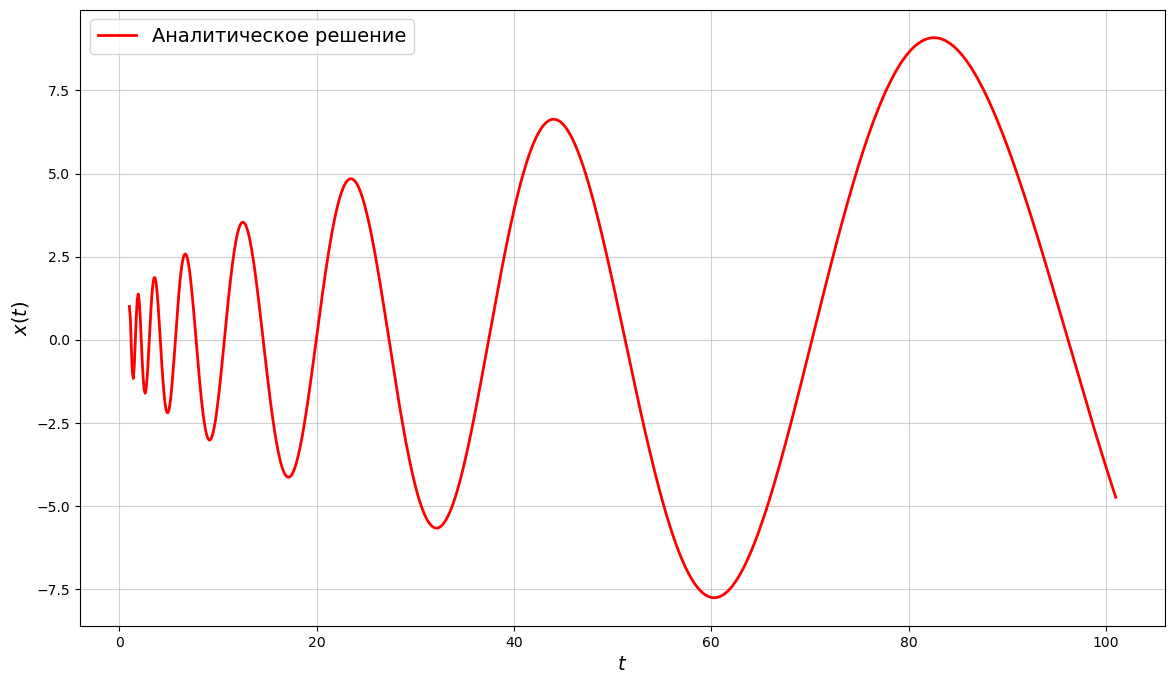

In [5]:
plt.figure(figsize=(14,8))
grid = np.linspace(1,101, 1000)
plt.plot(grid, solut(grid), color='red', lw=2, label='Аналитическое решение')
plt.grid(alpha=0.6)
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel(r'$x(t)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

**Посмотроим на полученное решение в фазовом простанстве $\mathbb R^2 (x, \dot{x})$**

In [9]:
import sympy as sp

t = sp.Symbol('t')

In [10]:
x = t**0.5 * (sp.cos(sp.sqrt(399)/2 * sp.log(t)) + 1/sp.sqrt(399)*sp.sin(sp.sqrt(399)/2 * sp.log(t)))
dx = sp.diff(x,t)
dx_f = sp.lambdify(t, dx)
x_f  = sp.lambdify(t, x)

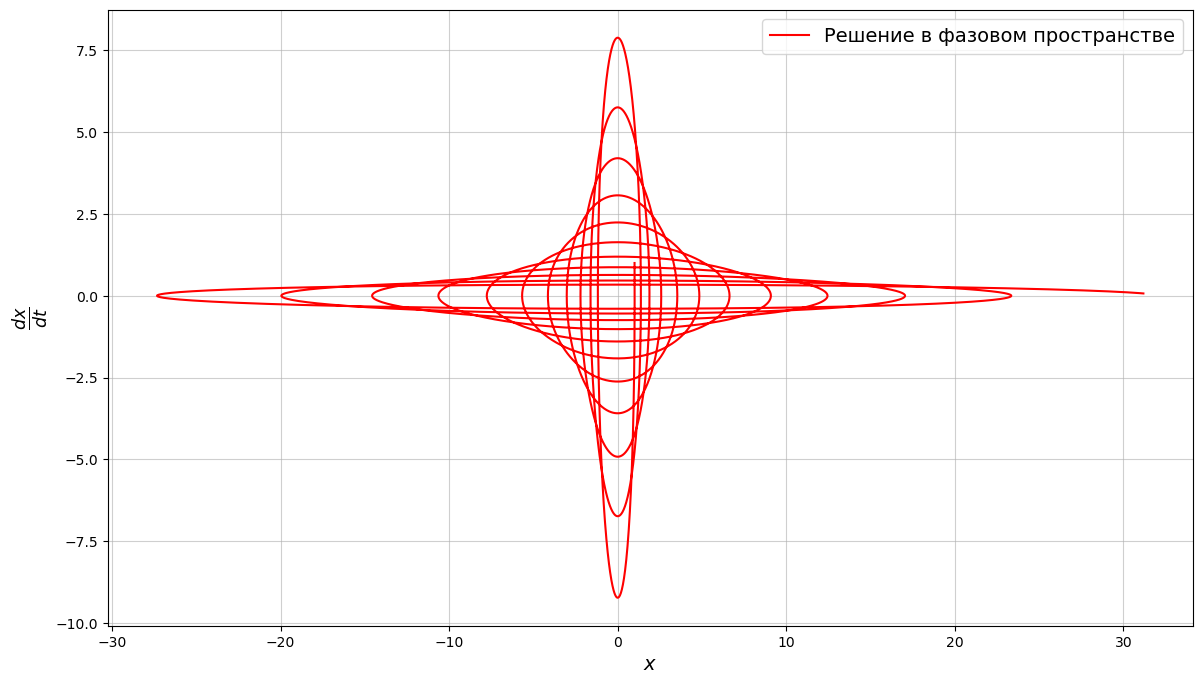

In [13]:
plt.figure(figsize=(14,8))
grid = np.logspace(0, np.log10(1000), 10000)
plt.plot(x_f(grid), dx_f(grid), color='red', label='Решение в фазовом пространстве', lw=1.5)
# plt.plot(grid, np.sqrt(grid), color='black', label='Огибающая')
# plt.plot(grid, -np.sqrt(grid), color='black')
plt.grid(alpha=0.6)
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$\frac{dx}{dt}$', fontsize=18)
plt.legend(fontsize=14)
plt.show()

### Часть 2: Численные методы

**Методы Эйлера:**
Разобьём исходное уравнение на 2, чтобы получить систему 1 порядка. Сделаем замену:
$$
\begin{cases}
y_1 = x\\
y_2 = \dot{x}
\end{cases}
$$
Тогда система примет вид:
$$
\begin{cases}
\dot{y_1} = y_2\\
\dot{y_2} = - 100\frac{y_1}{t^2}
\end{cases};~~~~~ y_1(1) = y_2(1)=1
$$

Распишем методы Эйлера для данной системы:
* Явный метод Эйлера:
$$
y_{n+1} = y_n + \tau f(t_n, y_n)
$$
Для построения данного метода используется рекуррентный счёт
* Неявный метод Эйлера:
$$ y_{n+1} = y_n + \tau f(t_{n+1}, y_{n+1}) $$
В данном методе необходимо итерационно решать нелинейные уравнения
* Метод Эйлера с центральной точкой:
$$ \frac{y_{n+1} - y_{n-1}}{2\tau} = f(t_n, y_n)$$

**Метод трапеций:**
$$ y_{n+1}  = y_n + \frac \tau2 \left(f(t_n, y_n) + f(t_{n+1},y_{n+1}) \right)$$

Реализуем описанные выше методы:

In [165]:
# Определение системы дифференциальных уравнений
def system(t, y):
 y1, y2 = y
 dy1dt = y2
 dy2dt = -100 * y1 / t**2
 return np.array([dy1dt, dy2dt])


Явный метод Эйлера:

In [166]:
def explicit_euler(system, t_span, y0, h):
 t_values = np.arange(t_span[0], t_span[1] + h, h)
 y_values = np.zeros((len(t_values), len(y0)))
 y_values[0] = y0
 for i in range(1, len(t_values)):
    y_values[i] = y_values[i - 1] + h * system(t_values[i - 1],
y_values[i - 1])
 return t_values, y_values

Неявный метод Эйлера

In [167]:
def implicit_euler(system, t_span, y0, h, max_iter=10, tol=1e-6):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for i in range(1, len(t_values)):
        t_next = t_values[i]
        y_prev = y_values[i - 1]
        y_next = y_prev
        
        for _ in range(max_iter):
            f = y_next - y_prev - h * system(t_next, y_next)
            if np.linalg.norm(f) < tol:
                break

            y_next -= f
        y_values[i] = y_next
    return t_values, y_values

Метод Эйлера с центральной точкой:

In [169]:
def midpoint_euler(system, t_span, y0, h):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for i in range(1, len(t_values)):
        t_half = t_values[i - 1] + h / 2
        y_half = y_values[i - 1] + (h / 2) * system(t_values[i - 1], y_values[i - 1])
        y_values[i] = y_values[i - 1] + h * system(t_half, y_half)
    return t_values, y_values

Метод Трапеций:

In [168]:
def trapez(system, t_span, y0, h):
    return (implicit_euler(system, [t_start, t_end], y0, h)[0] +
             explicit_euler(system, [t_start, t_end], y0, h)[0])*0.5,(implicit_euler(system, [t_start, t_end], y0, h)[1] + 
                                                                      explicit_euler(system, [t_start, t_end], y0, h)[1])*0.5

### Построение графиков:

Введём праметры нашей задачи, начальные условия, начальное и конечное значение $t$, шаг $h$:

In [170]:
t_start = 1
t_ends = [2, 11, 101, 1001]
y0 = [1, 1] # x(1) = 1, x'(1) = 1
h = 0.1

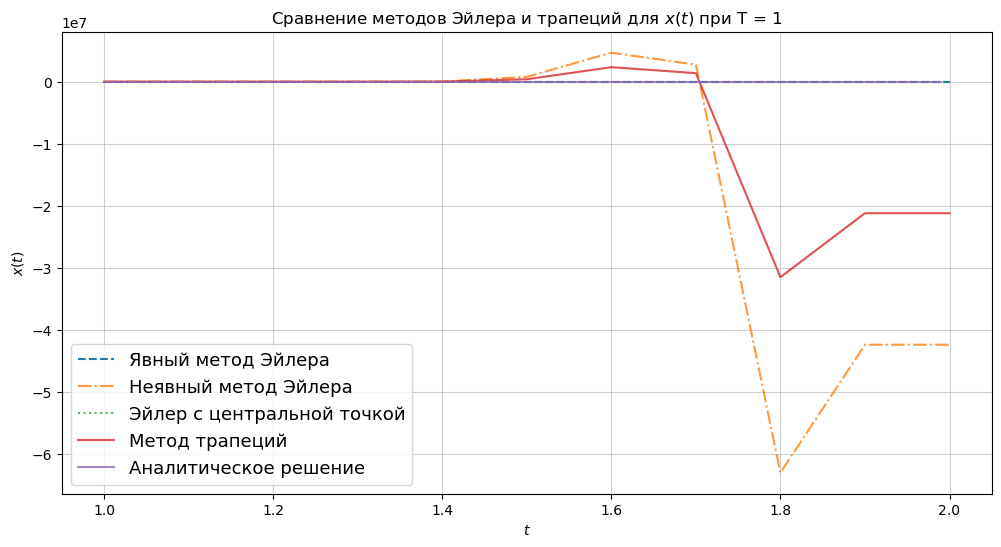

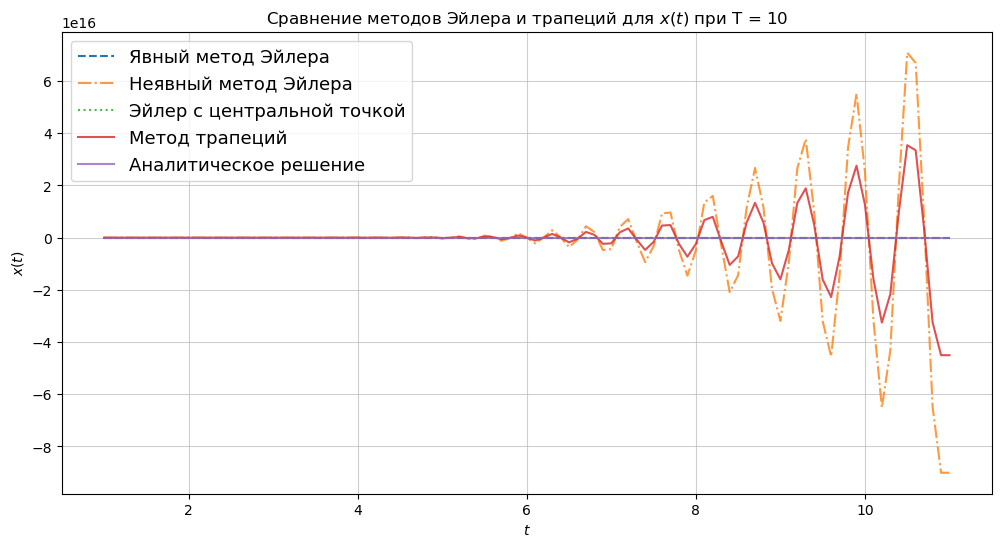

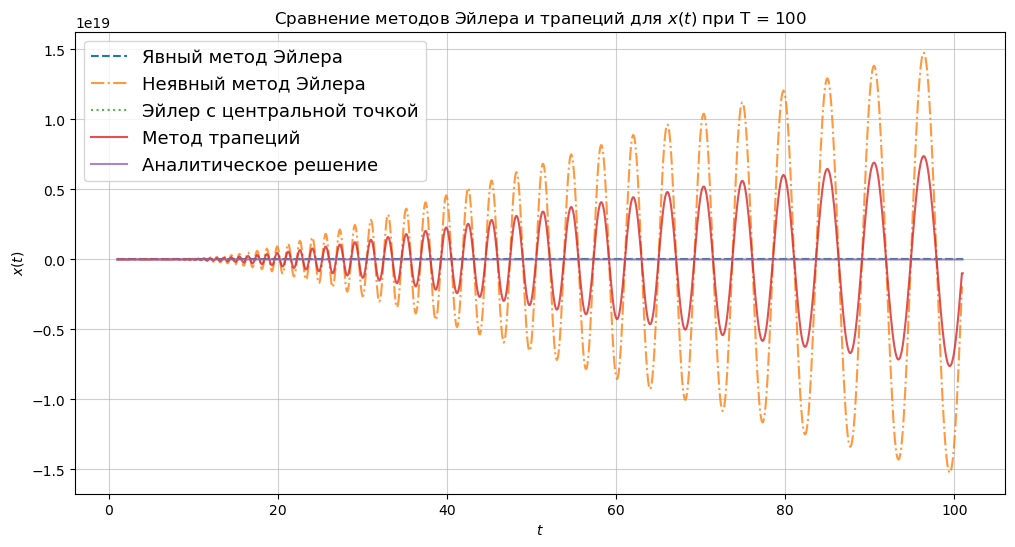

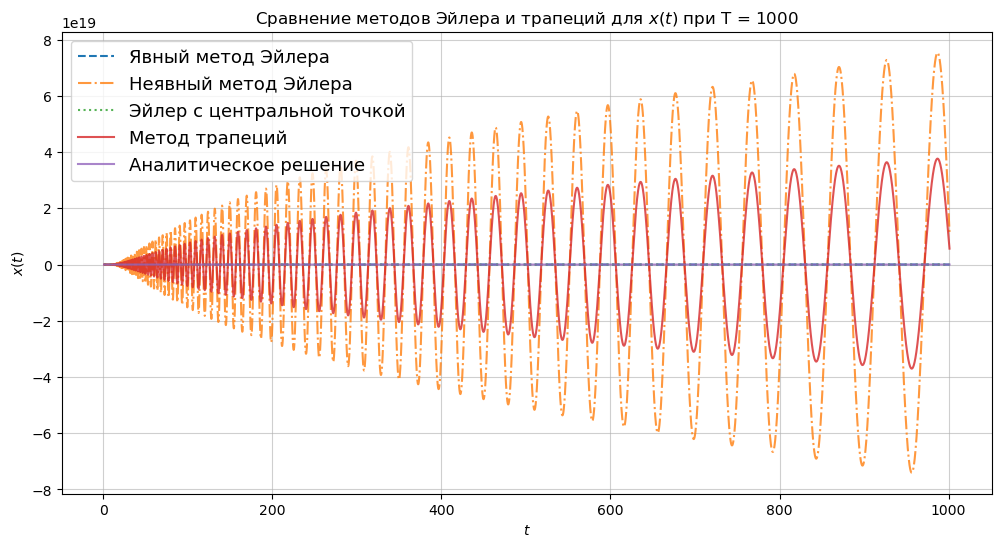

In [ ]:
for t_end in t_ends:
# Решения
    t_explicit, y_explicit = explicit_euler(system, [t_start, t_end], y0, h)
    t_implicit, y_implicit = implicit_euler(system, [t_start, t_end], y0, h)
    t_midpoint, y_midpoint = midpoint_euler(system, [t_start, t_end], y0, h)
    t_trap, y_trap = trapez(system, [t_start, t_end], y0, h)
    # Построение графиков
    plt.figure(figsize=(12, 6))
    
    t = np.linspace(1, 1001, 100000)
    plt.plot(t_explicit, y_explicit[:, 0], label="Явный метод Эйлера", linestyle="--")
    plt.plot(t_implicit, y_implicit[:, 0], label="Неявный метод Эйлера", linestyle="-.", alpha = 0.8)
    plt.plot(t_midpoint, y_midpoint[:, 0], label="Эйлер с центральной точкой", linestyle=":", alpha = 0.8)
    plt.plot(t_trap, y_trap[:, 0], label="Метод трапеций", linestyle="-", alpha = 0.8)
    plt.plot(t[t < t_end], solut(t[t < t_end]), label = 'Аналитическое решение', alpha =0.8)
   
    plt.title(f"Сравнение методов Эйлера и трапеций для $x(t)$ при Т = {t_end-t_start}")
    plt.xlabel("$t$")
    plt.ylabel("$x(t)$")
    plt.legend(fontsize=13)
    plt.grid(alpha=0.6)
    plt.show()

По полученным графикам видно, что Неявный метод Эйлера и метод трапеций сильно осциллируют с огромной (до $10^{19}$) амплитудой и не позволяют разгдядеть точность других методов. Построим графики без них.

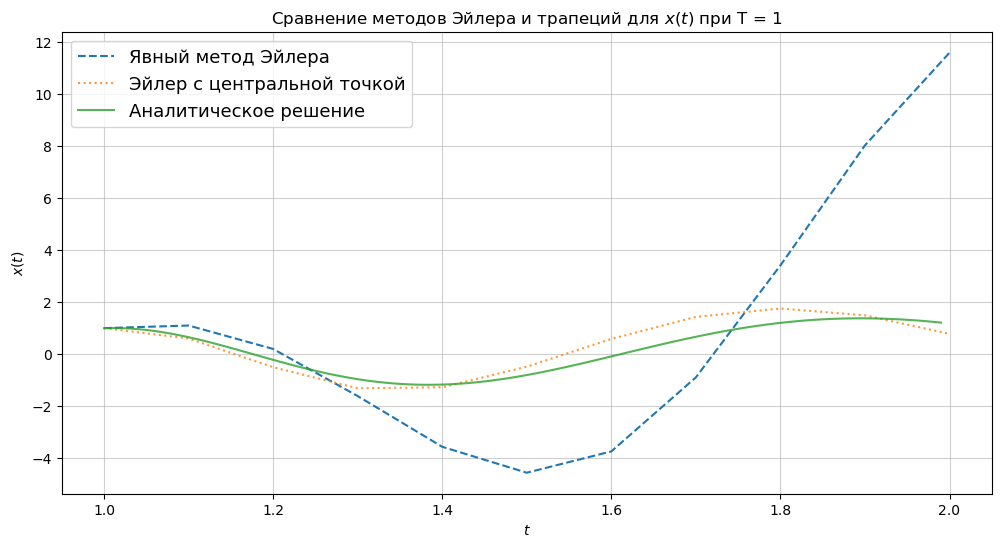

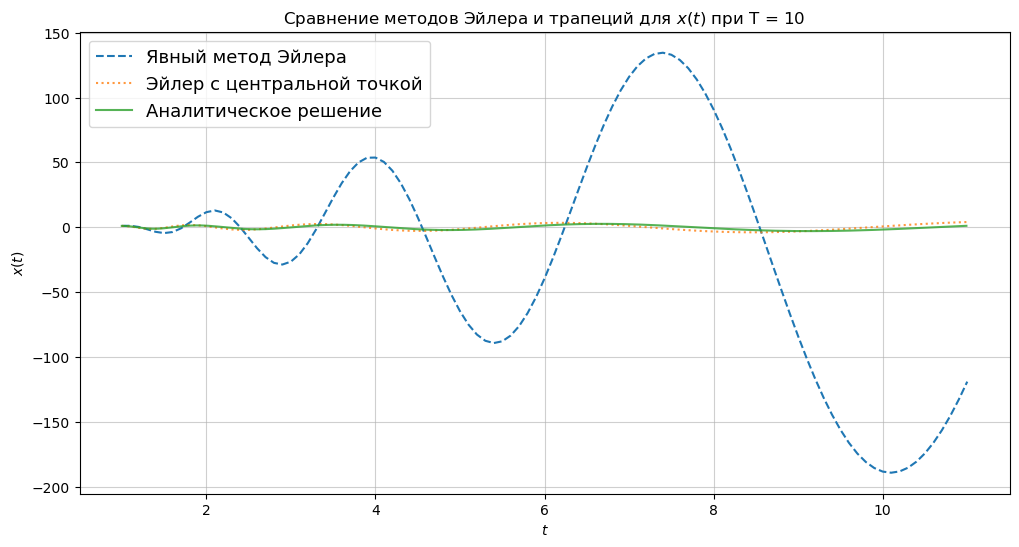

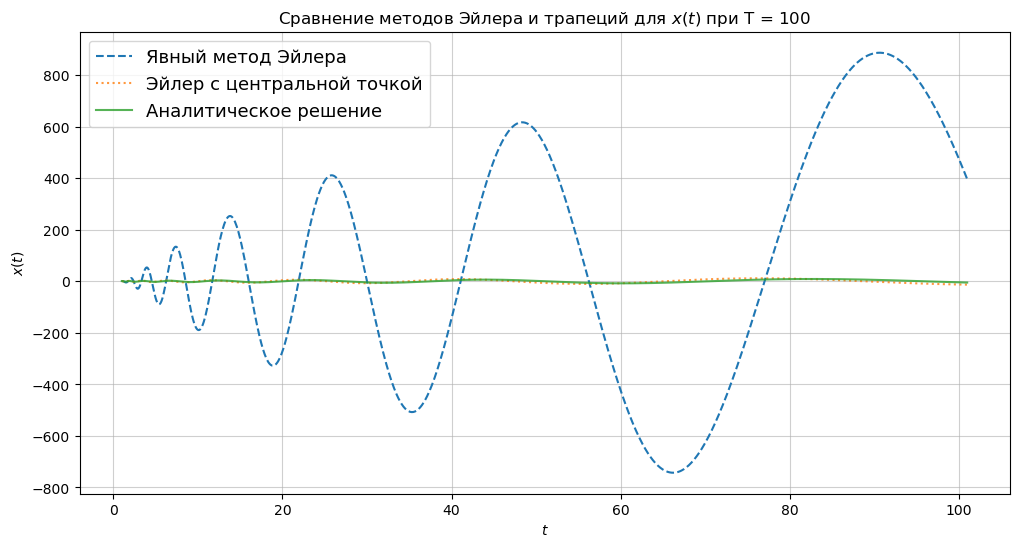

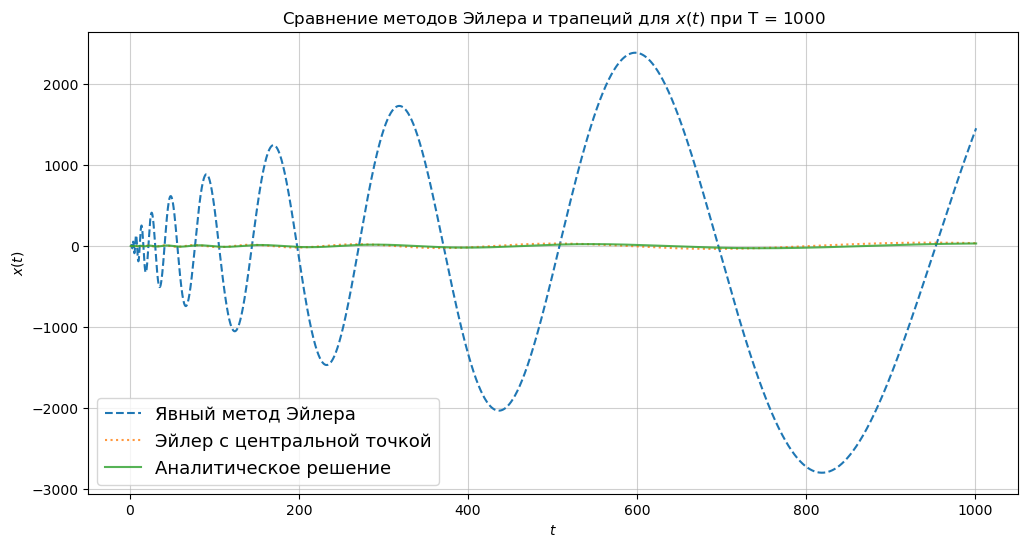

In [16]:
for t_end in t_ends:
# Решения
    t_explicit, y_explicit = explicit_euler(system, [t_start, t_end], y0, h)
    t_implicit, y_implicit = implicit_euler(system, [t_start, t_end], y0, h)
    t_midpoint, y_midpoint = midpoint_euler(system, [t_start, t_end], y0, h)
    t_trap, y_trap = trapez(system, [t_start, t_end], y0, h)
    # Построение графиков
    plt.figure(figsize=(12, 6))
    # Графики для x(t)
    t = np.linspace(1, 1001, 100000)
    plt.plot(t_explicit, y_explicit[:, 0], label="Явный метод Эйлера", linestyle="--")
    plt.plot(t_midpoint, y_midpoint[:, 0], label="Эйлер с центральной точкой", linestyle=":", alpha = 0.8)
    plt.plot(t[t < t_end], solut(t[t < t_end]), label = 'Аналитическое решение', alpha =0.8)
    # Настройки графика
    plt.title(f"Сравнение методов Эйлера и трапеций для $x(t)$ при Т = {t_end-t_start}")
    plt.xlabel("$t$")
    plt.ylabel("$x(t)$")
    plt.legend(fontsize=13)
    plt.grid(alpha=0.6)
    plt.show()

На данном этапе сравнения можно заметить, что лучше всего аналитическое решение приближает численный метод Эйлера с центральной точкой. Наихудший резульат наблюдается для неявного метода Эйлера.

**Методы Рунге-Кутты**

Воспользуемся опредлением явного s-стадийного метода Рунге-Кутты для численного решения задачи Коши для ОДУ.
* Для 2 порядка:
$$
k_1 = f(t_n, y^n), ~~~ k_2 = f(t_n + \tau, y^n + k_1)
$$
Решение будет определяться следующим выражением:
$$
y^{n+1} = y^n + \tau \frac{k_1 + k_2}{2}
$$
* Для 3 порядка:
$$
k_1 = f(t_n, y^n), ~~~ k_2 = f(t_n + \frac \tau2, y^n + \frac{k_1}{ 2}), ~~~ k_3 = f(t_n + \tau, y^n - k_1 + 2k_2)
$$
Решение будет определяться следующим выражением:
$$
y^{n+1} = y^n + \tau \frac{k_1 + 4k_2 + k_3}{6}
$$
* Для 4 порядка:
$$
k_1 = f(t_n, y^n), ~~~ k_2 = f(t_n + \frac \tau2, y^n + \frac{k_1}{ 2}),~~~ k_3 = f(t_n + \frac \tau2, y^n + \frac{k_2}{ 2}), ~~~ k_4 = f(t_n + \tau, y^n + k_3)
$$
Решение будет определяться следующим выражением:
$$
y^{n+1} = y^n + \tau \frac{k_1 + 2k_2 + 2k_3 + k_4}{6}
$$

Построим графики численного решения задачи Коши методом Рунге-Кутты. Для начала реализуем методы Рунге-Кутты 2,3,4 порядков на языке `python`.

Метод 2 порядка:

In [1]:
# Метод Рунге-Кутты 2-го порядка
def runge_kutta_2(system, t_span, y0, h):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[i - 1]
        k1 = h * system(t, y)
        k2 = h * system(t + h, y + k1)
        y_values[i] = y + (k1 + k2) / 2
    return t_values, y_values

Метод 3 порядка:

In [3]:
# Метод Рунге-Кутты 3-го порядка
def runge_kutta_3(system, t_span, y0, h):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[i - 1]
        k1 = h * system(t, y)
        k2 = h * system(t + h / 2, y + k1 / 2)
        k3 = h * system(t + h, y - k1 + 2 * k2)
        y_values[i] = y + (k1 + 4 * k2 + k3) / 6
    return t_values, y_values

Метод 4 порядка:

In [4]:
def runge_kutta_4(system, t_span, y0, h):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[i - 1]
        k1 = h * system(t, y)
        k2 = h * system(t + h / 2, y + k1 / 2)
        k3 = h * system(t + h / 2, y + k2 / 2)
        k4 = h * system(t + h, y + k3)
        y_values[i] = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return t_values, y_values

Зададим параметры нашей задачи: начальные условия $x(1) = \dot{x}(1)=1$, диапазоны $t$ и шаг $h$:

In [17]:
t_start, t_end = 1, 101
t_ends = [2, 11, 101, 1001]
y0 = [1, 1] 
h = 0.1

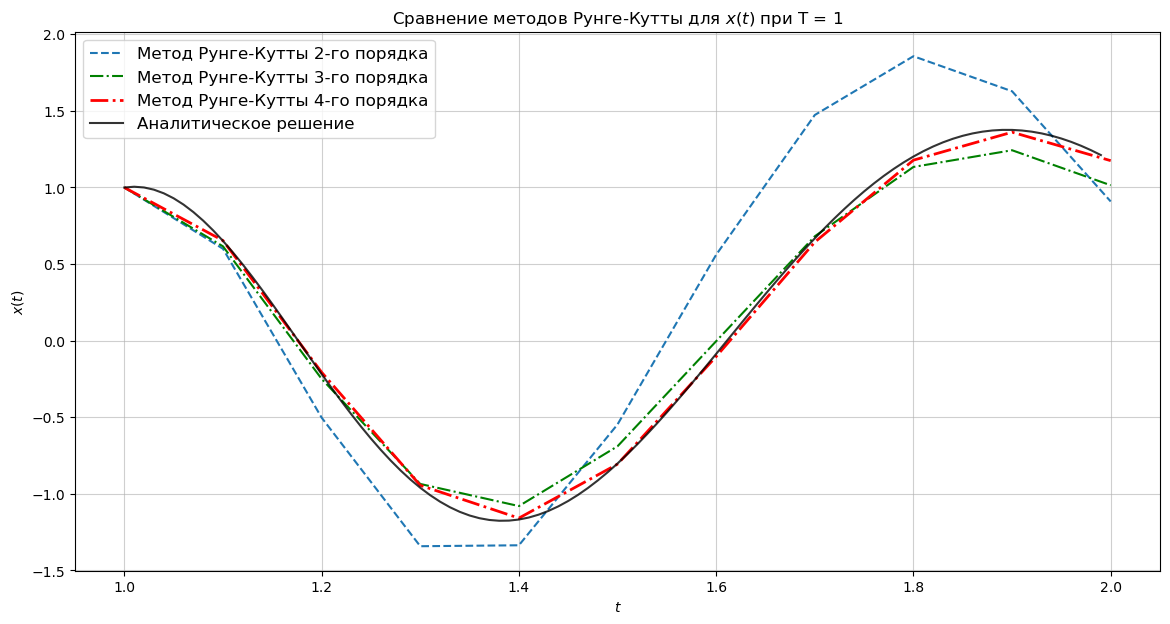

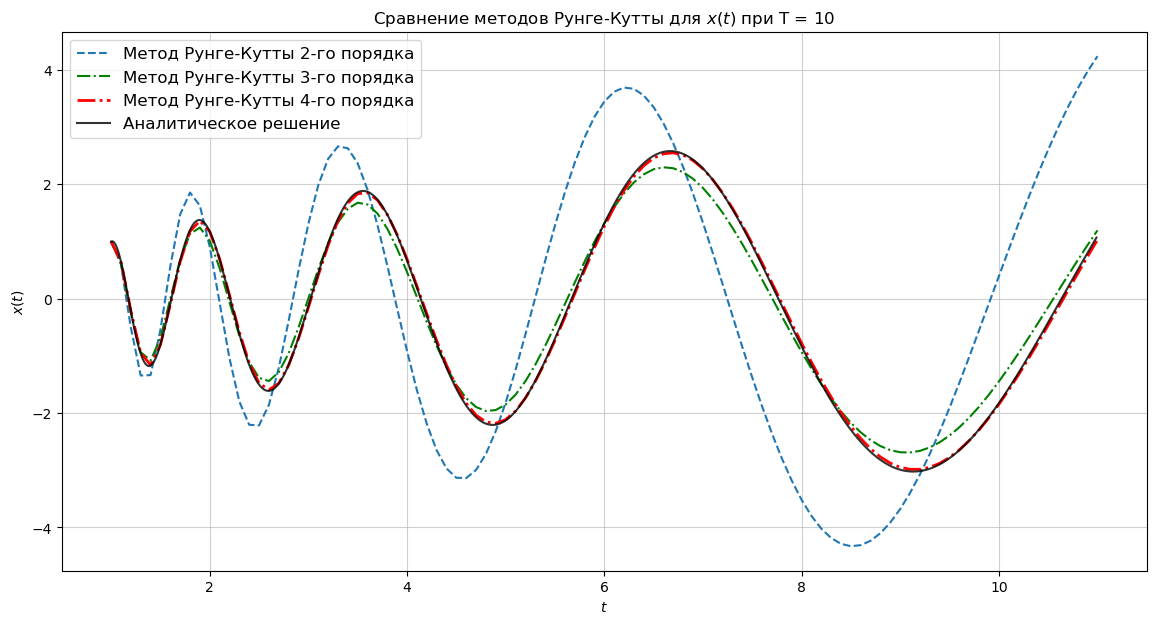

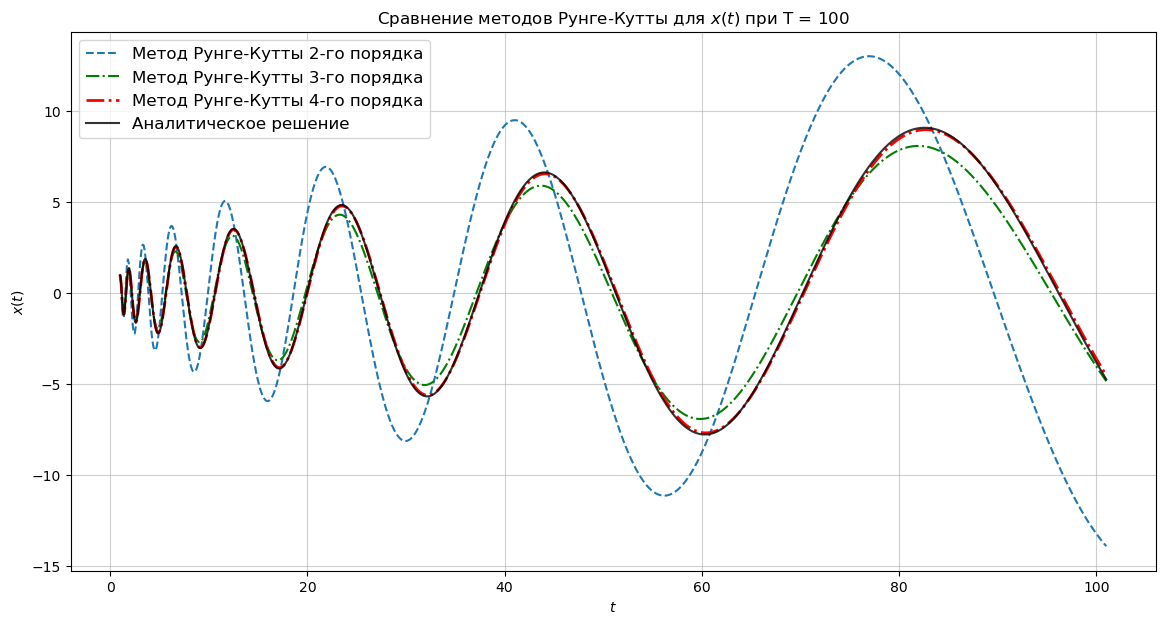

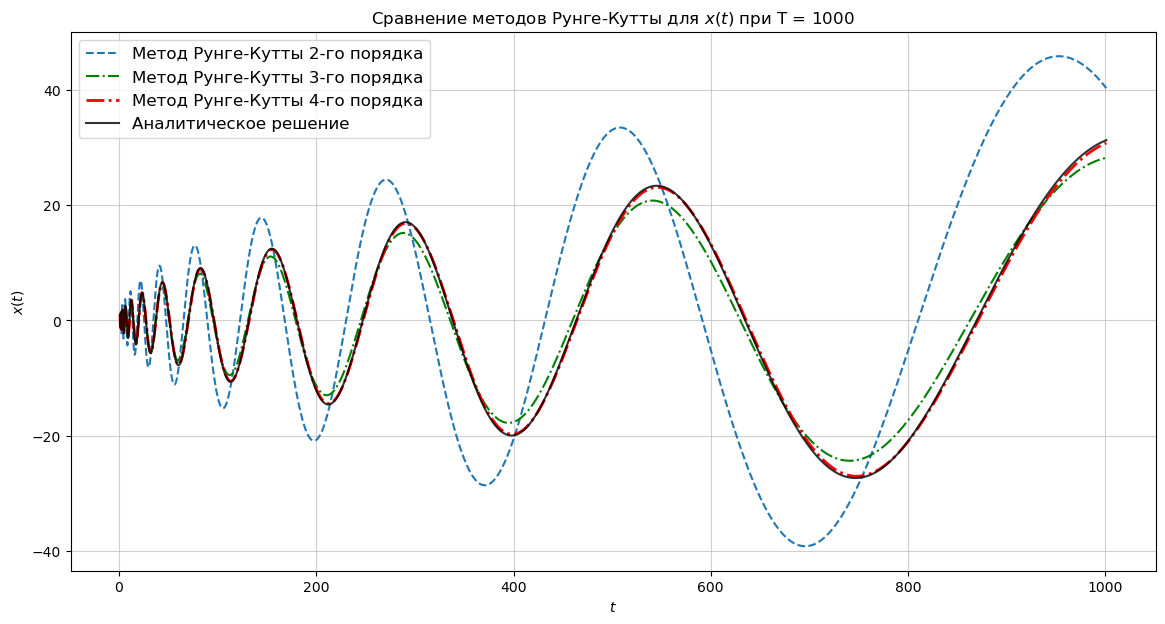

In [25]:
for t_end in t_ends:
    t_rk2, y_rk2 = runge_kutta_2(system, [t_start, t_end], y0, h)
    t_rk3, y_rk3 = runge_kutta_3(system, [t_start, t_end], y0, h)
    t_rk4, y_rk4 = runge_kutta_4(system, [t_start, t_end], y0, h)
    # Построение графиков
    plt.figure(figsize=(14, 7))

    plt.plot(t_rk2, y_rk2[:, 0], label="Метод Рунге-Кутты 2-го порядка", linestyle="--")
    plt.plot(t_rk3, y_rk3[:, 0], label="Метод Рунге-Кутты 3-го порядка", linestyle="-.", color='green')
    plt.plot(t_rk4, y_rk4[:, 0], label="Метод Рунге-Кутты 4-го порядка", linestyle="dashdot",color='red', lw=2)
    plt.plot(t[t < t_end], solut(t[t < t_end]), label = 'Аналитическое решение', alpha =0.8, color='black')

    plt.title(f"Сравнение методов Рунге-Кутты для $x(t)$ при Т = {t_end - t_start}")
    plt.xlabel("$t$")
    plt.ylabel("$x(t)$")
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6)
    plt.show()

Сравнивая полученные графики с графиками предыдущих методов видно, что методы Рунге-Кутты приближают истинное решение значительно лучше для всех значений $T$.

Построим график зависимости погрешности методов Рунге Кутты разного порядка от $t$

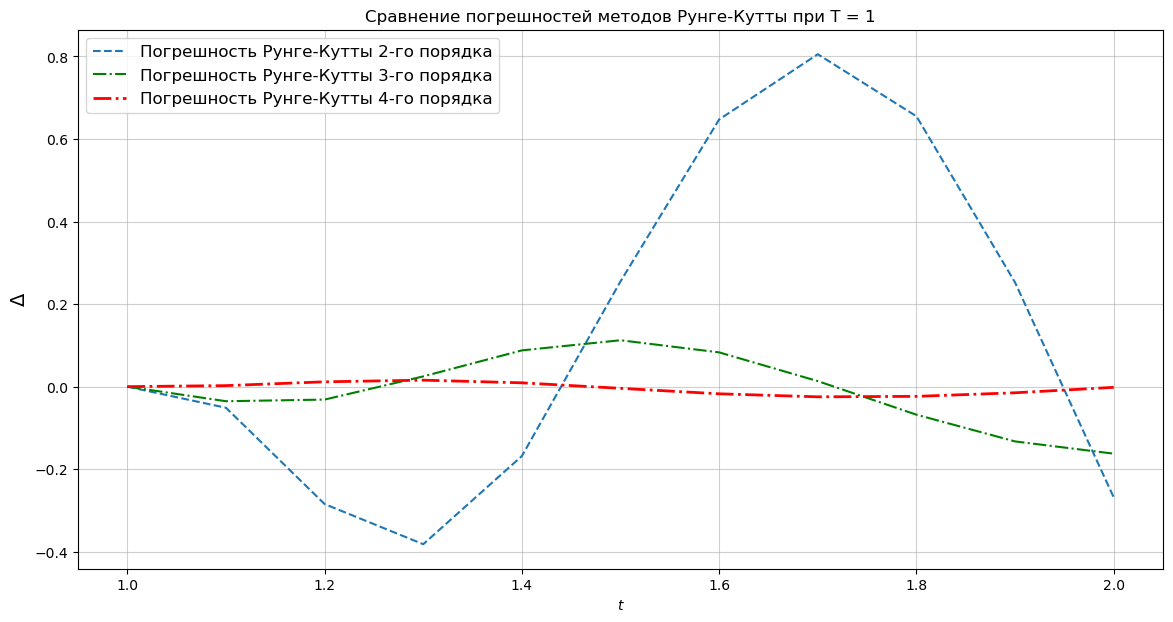

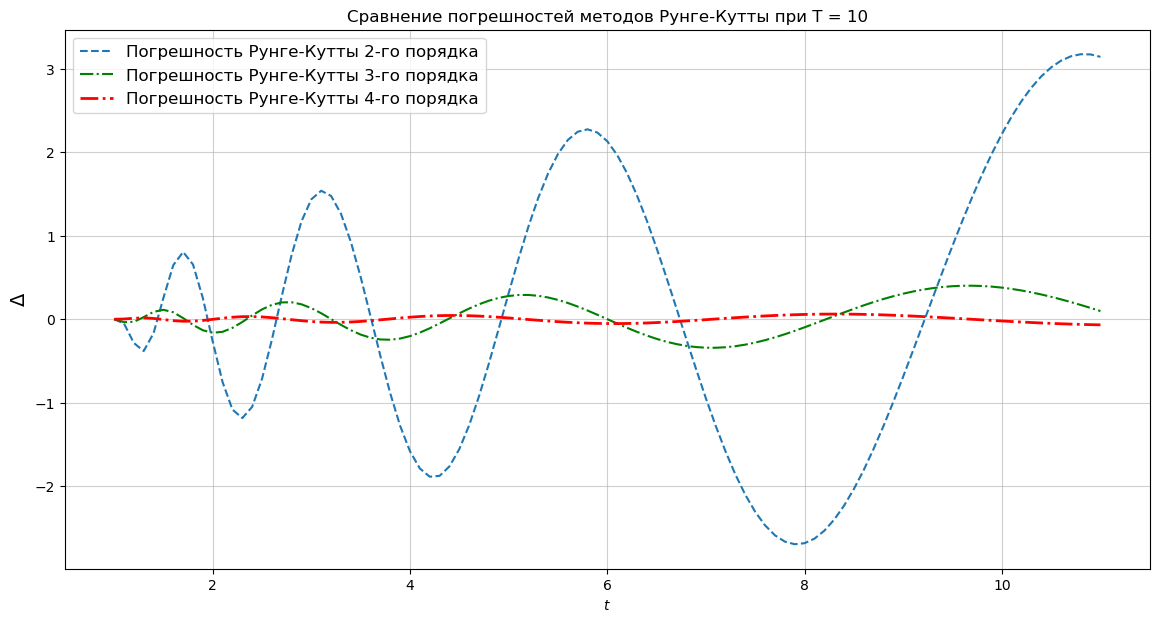

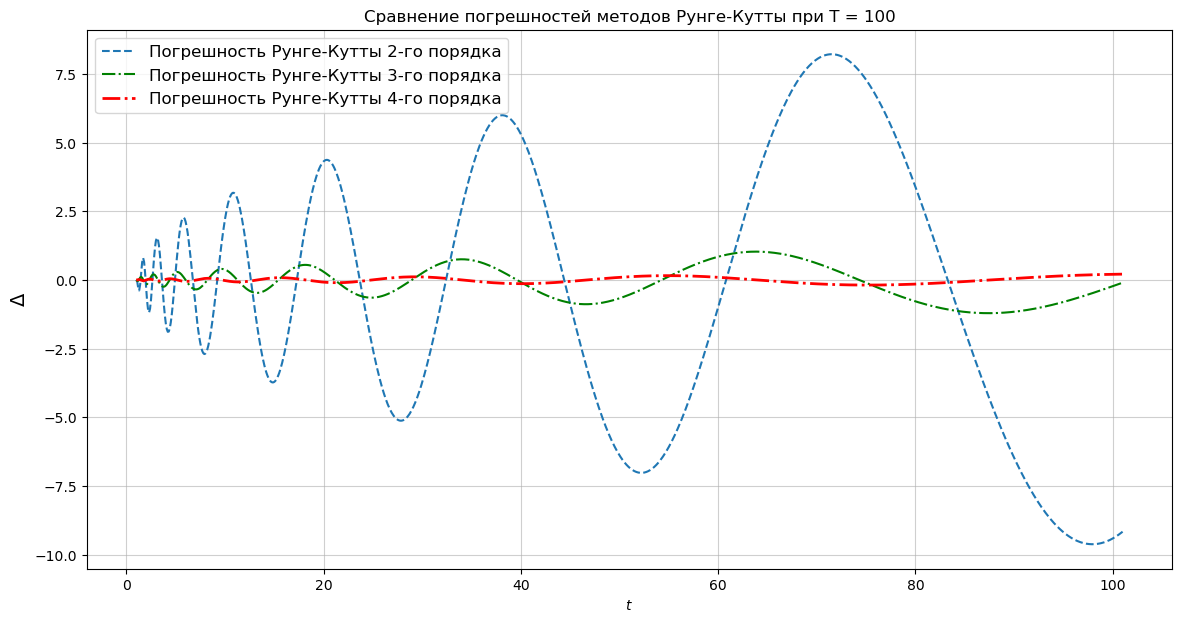

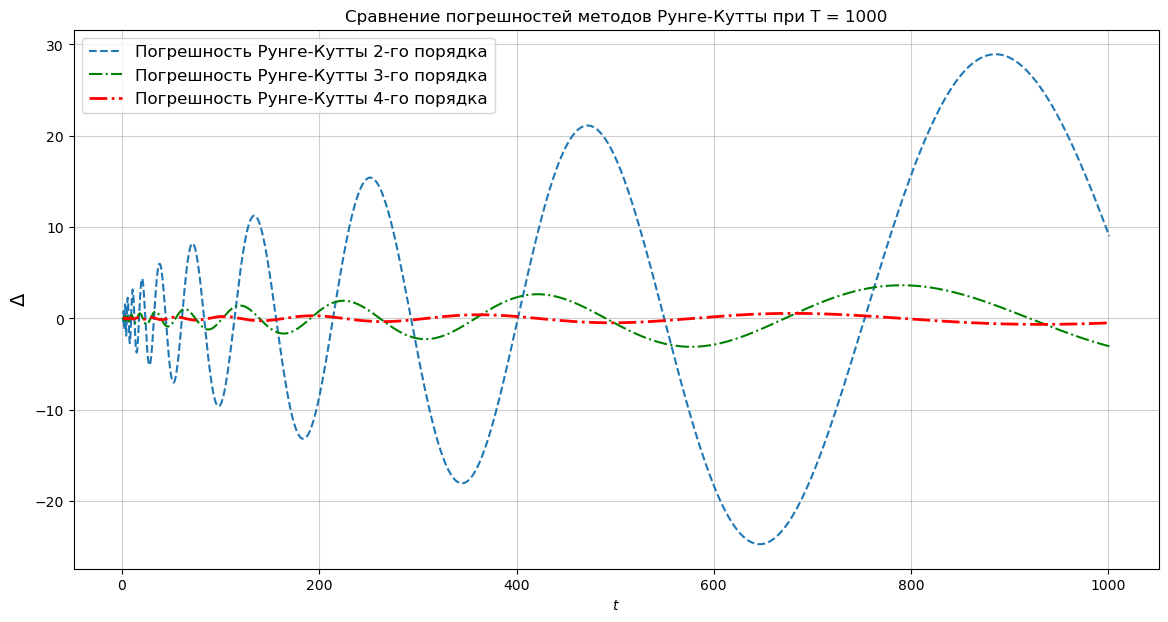

In [30]:
for t_end in t_ends:
    t_rk2, y_rk2 = runge_kutta_2(system, [t_start, t_end], y0, h)
    t_rk3, y_rk3 = runge_kutta_3(system, [t_start, t_end], y0, h)
    t_rk4, y_rk4 = runge_kutta_4(system, [t_start, t_end], y0, h)
    # Построение графиков
    plt.figure(figsize=(14, 7))

    plt.plot(t_rk2, (y_rk2[:, 0] - solut(t_rk2)), label="Погрешность Рунге-Кутты 2-го порядка", linestyle="--")
    plt.plot(t_rk3, (y_rk3[:, 0] - solut(t_rk3)), label="Погрешность Рунге-Кутты 3-го порядка", linestyle="-.", color='green')
    plt.plot(t_rk4, (y_rk4[:, 0] - solut(t_rk4)), label="Погрешность Рунге-Кутты 4-го порядка", linestyle="dashdot",color='red', lw=2)

    plt.title(f"Сравнение погрешностей методов Рунге-Кутты при Т = {t_end - t_start}")
    plt.xlabel("$t$")
    plt.ylabel("$\Delta$", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6)
    plt.show()

**Метод Дормана-Принса**

Данный метод является модификацией методов Рунге-Кутты, который использует адаптивный шаг который уменьшается при увеличении ошибки. Практически такой метод имеет 4-5 порядок.

Таблица Бутчера для него:

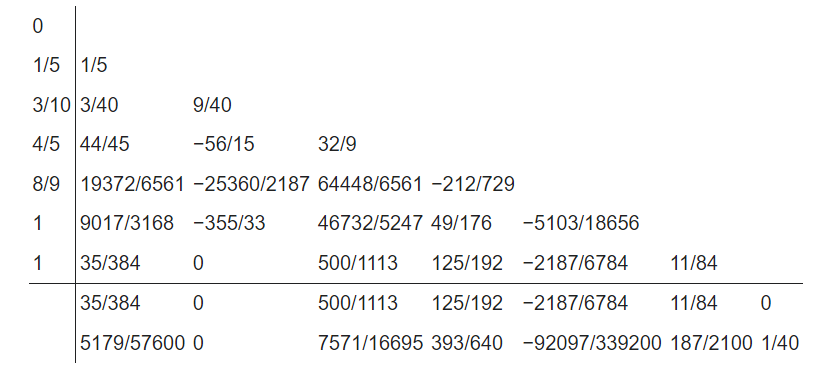

Реализуем данный метод:

In [34]:
def dormand_prince(system, t_span, y0, h, tol=1e-6):
    # Коэффициенты метода Дормана-Принса
    c = [0, 1/5, 3/10, 4/5, 8/9, 1, 1]
    a = [[], [1/5], [3/40, 9/40], [44/45, -56/15, 32/9],
    [19372/6561, -25360/2187, 64448/6561, -212/729],
    [9017/3168, -355/33, 46732/5247, 49/176, -5103/18656],
    [35/384, 0, 500/1113, 125/192, -2187/6784, 11/84],
    ]
    b5 = [35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0]
    b4 = [5179/57600, 0, 7571/16695, 393/640, -92097/339200, 187/2100,
    1/40]

    t_values = [t_span[0]]
    y_values = [y0]

    t, y = t_span[0], np.array(y0)
    while t < t_span[1]:
        if t + h > t_span[1]: # Уменьшаем шаг, если он выходит за пределы
            h = t_span[1] - t

        # Вычисление k1, k2, ..., k7
        k = np.zeros((7, len(y0)))
        for i in range(7):
            y_temp = y + sum(a[i][j] * k[j] for j in range(len(a[i])))* h if i > 0 else y
            k[i] = system(t + c[i] * h, y_temp)

        # Решение 5-го порядка
        y5 = y + np.dot(b5, k) * h
        # Решение 4-го порядка
        y4 = y + np.dot(b4, k) * h

        # Оценка ошибки
        error = np.linalg.norm(y5 - y4, ord=np.inf)

        # Адаптивный шаг
        if error < tol: # Если ошибка допустима
            t += h
            y = y5
            t_values.append(t)
            y_values.append(y)

        # Корректировка шага
        h = h * min(2, max(0.1, 0.9 * (tol / error)**(1/5)))

    return np.array(t_values), np.array(y_values)

Построим графики численного решения метода Дормана-Принса при разных $T$:

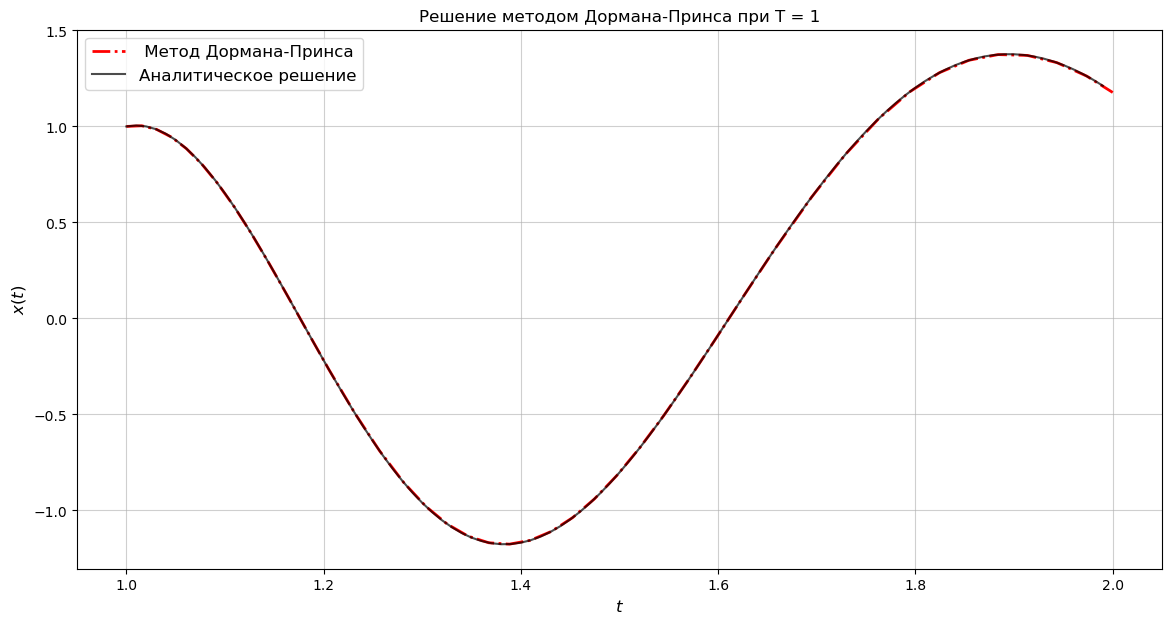

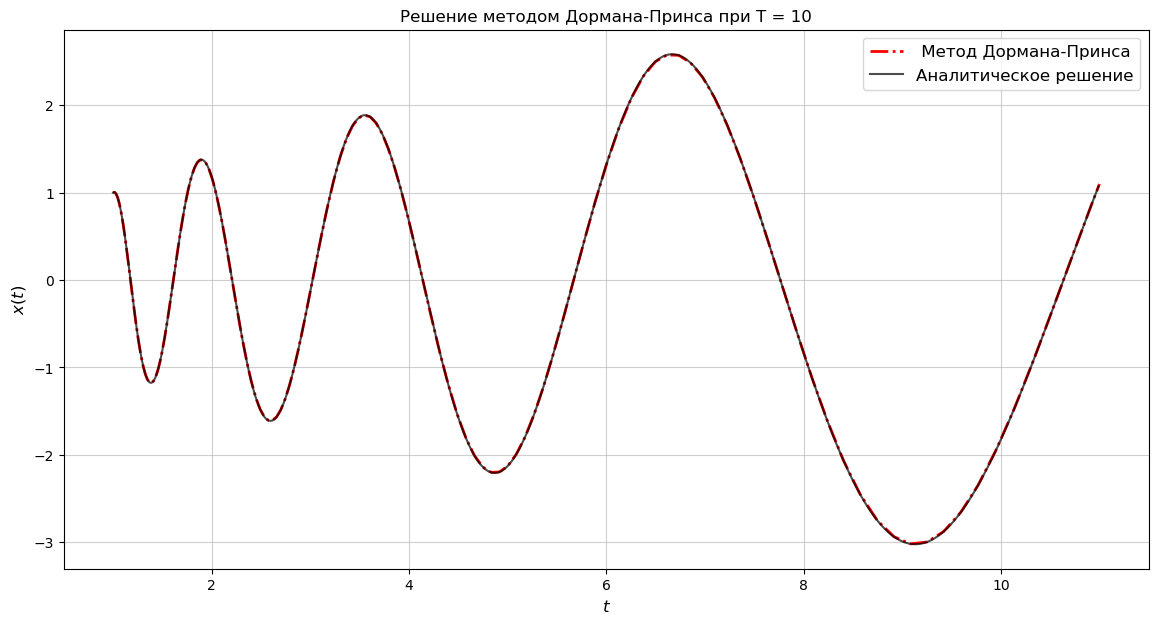

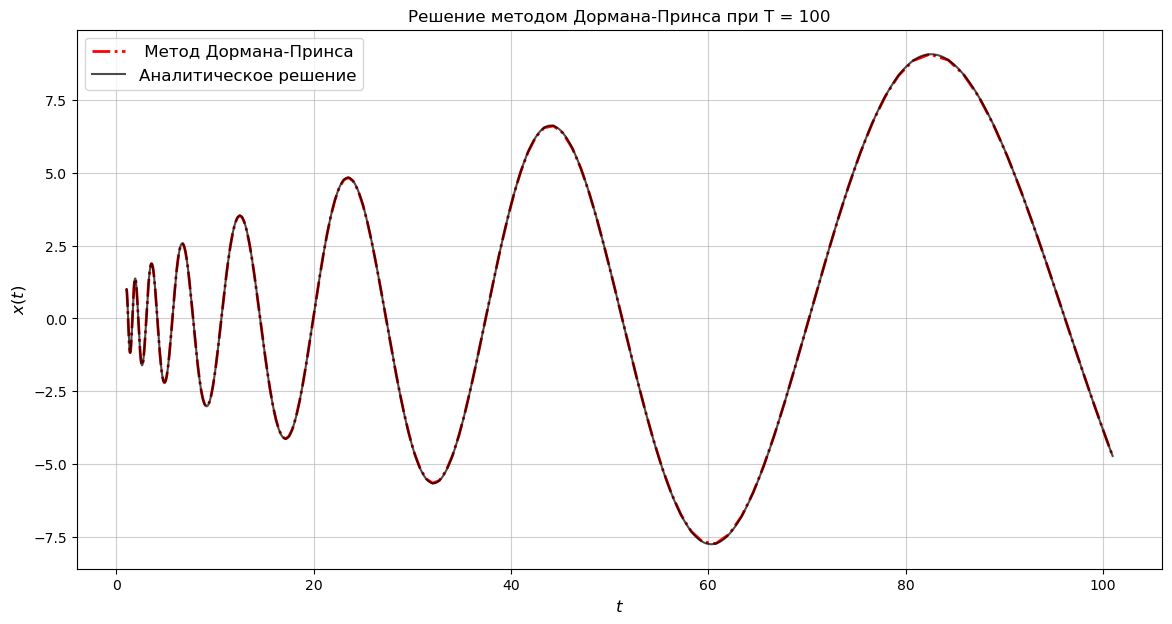

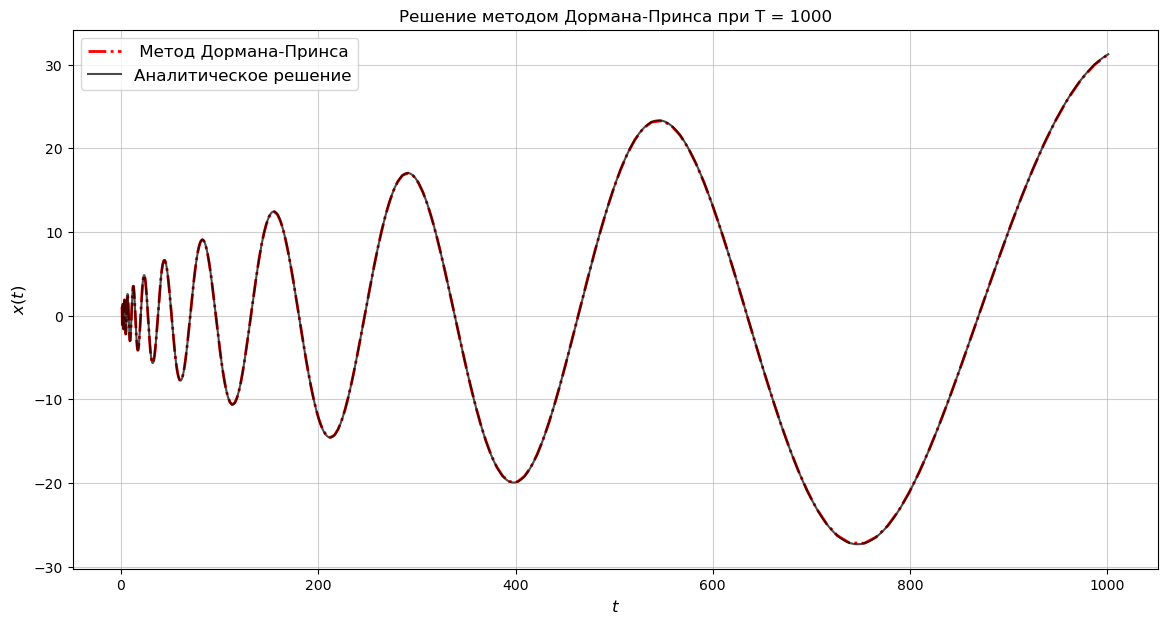

In [37]:
for t_end in t_ends:
    t_dp, y_dp = dormand_prince(system, [t_start, t_end], y0, h)
    # Построение графиков
    plt.figure(figsize=(14, 7))

    plt.plot(t_dp, y_dp[:, 0], label=" Метод Дормана-Принса", linestyle="dashdot",color='red', lw=2)
    plt.plot(t[t < t_end], solut(t[t < t_end]), label = 'Аналитическое решение', color='black', alpha=0.7)

    plt.title(f"Решение методом Дормана-Принса при Т = {t_end - t_start}")
    plt.xlabel("$t$", fontsize=12)
    plt.ylabel("$x(t)$", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6)
    plt.show()

На полученных графиках хорошо видно, что численное решение исходной задачи Коши методом Дормана-Принса почти идеально совпадает с аналитическим. Для получения большей информации построим график зависимости погрешности от $t$ в разном диапазоне:

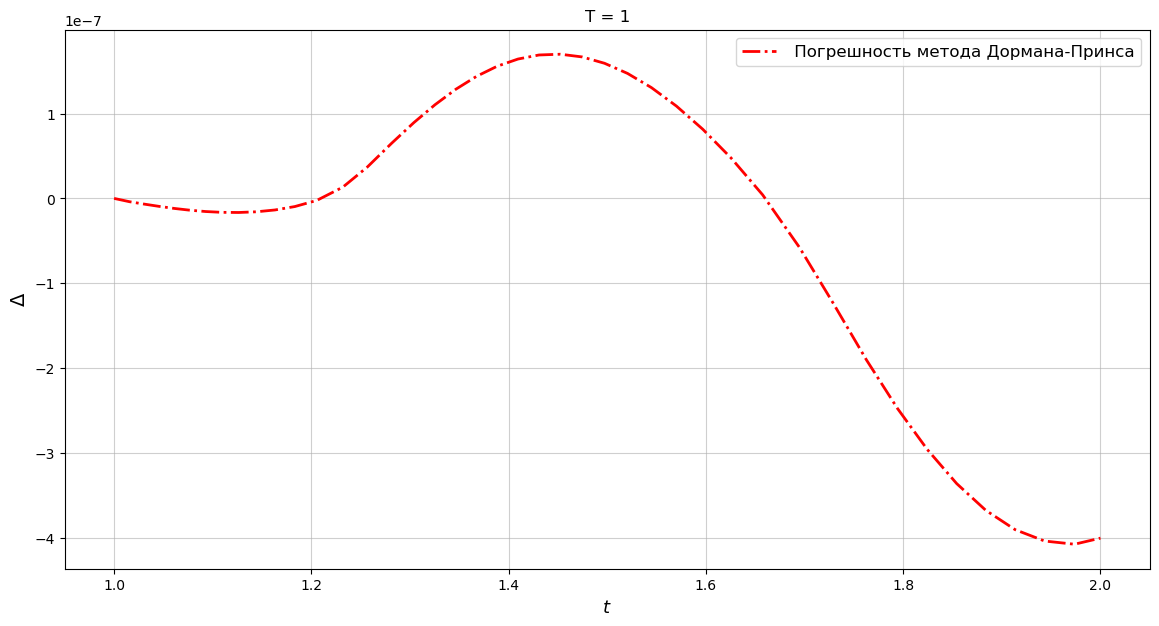

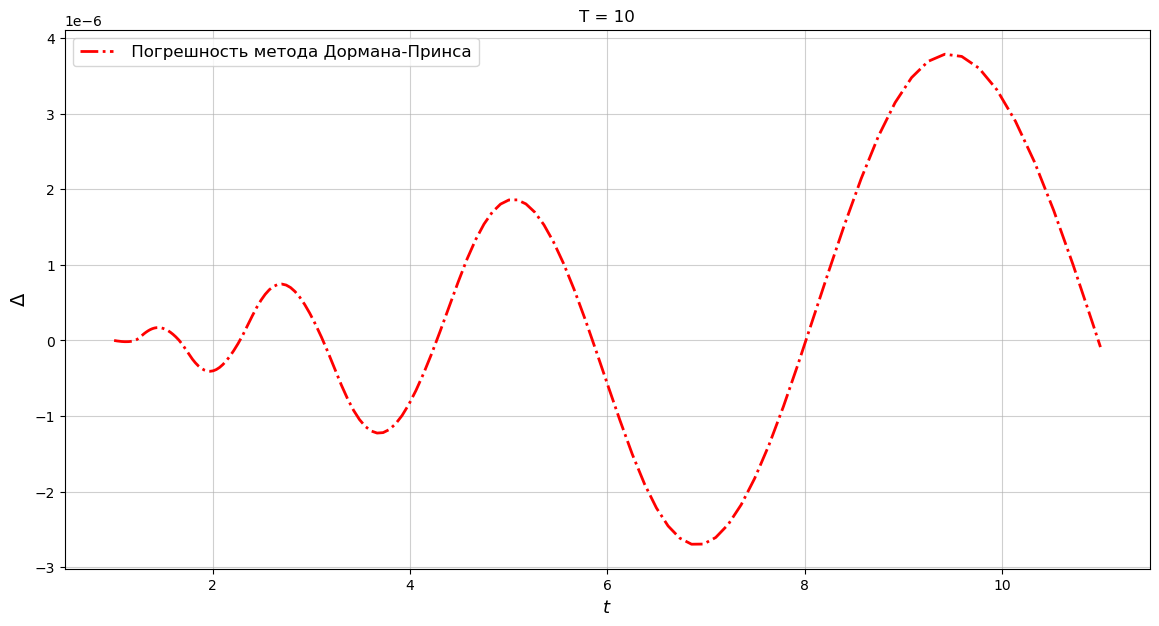

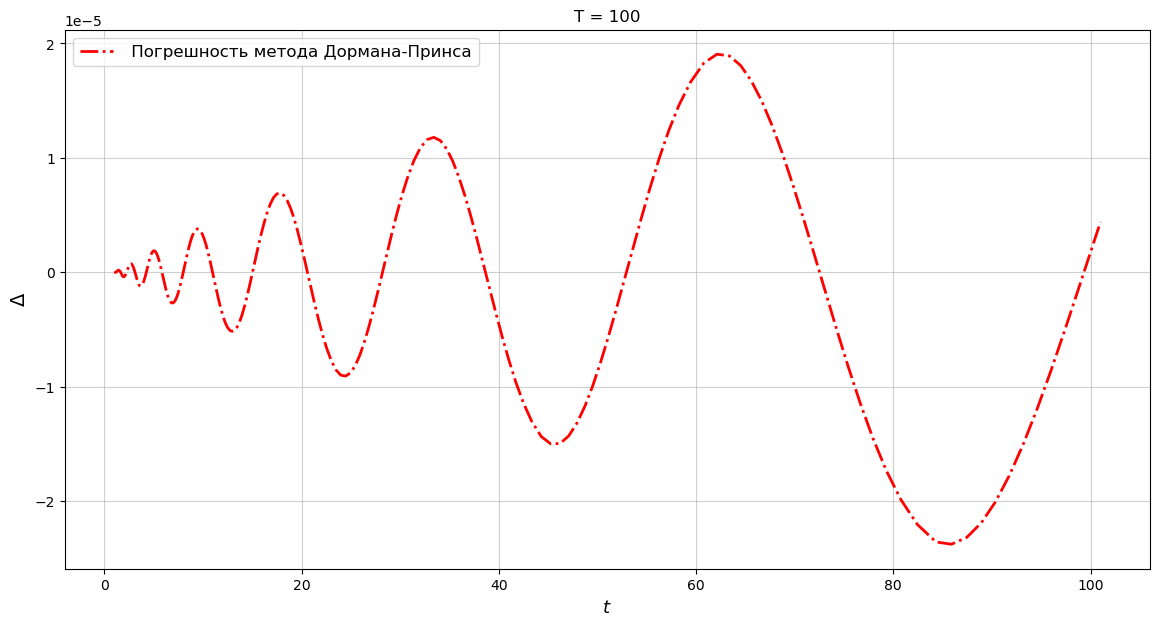

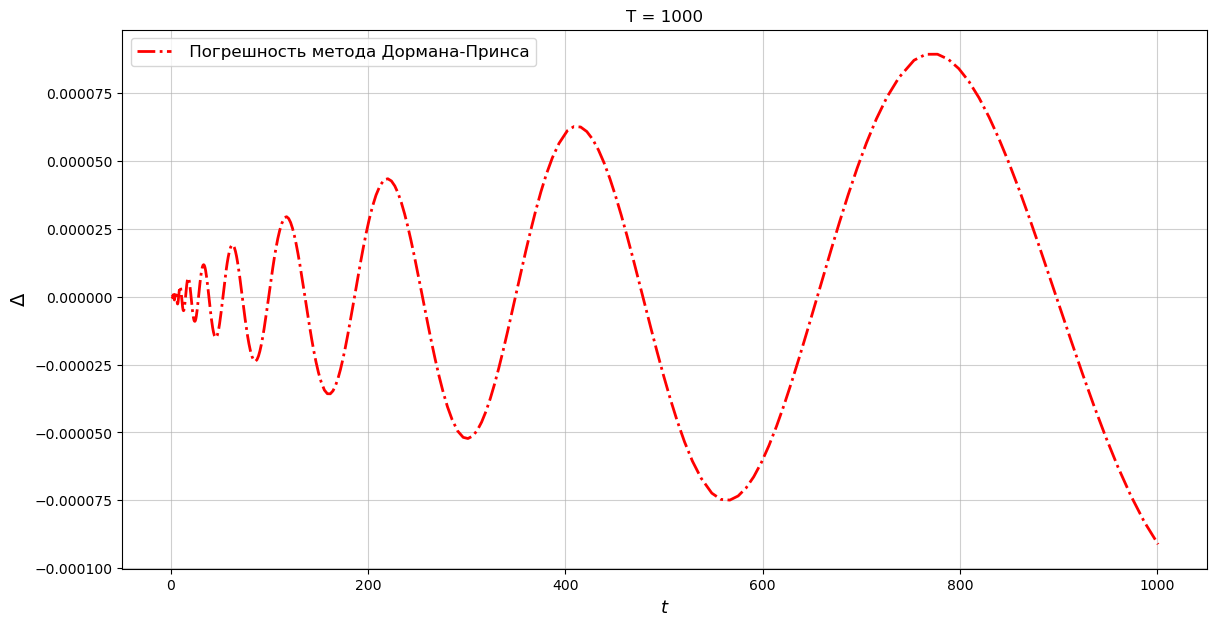

In [38]:
for t_end in t_ends:
    t_dp, y_dp = dormand_prince(system, [t_start, t_end], y0, h)
    # Построение графиков
    plt.figure(figsize=(14, 7))

    plt.plot(t_dp, (y_dp[:, 0] - solut(t_dp)), label=" Погрешность метода Дормана-Принса", linestyle="dashdot",color='red', lw=2)

    plt.title(f"Т = {t_end - t_start}")
    plt.xlabel("$t$", fontsize=13)
    plt.ylabel("$\Delta$", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6)
    plt.show()

Наибольшее отклонение от аналитического решение на отрезке $t \in [1; 1001]$ для данного метода не более чем $10^{-4}$. **Таким образом метод Дормана-Принса значительно превосходит по точности все рассмотренный ранее методы**, что связано с адаптивностью шага и в целом более высоким пордком метода.

Методы Рунге-Кутты различных порядков также показывают неплохой результат, однако на численное решение значительное влияние оказывате подсчёт коэффициентов из-за чего мы видим разницу в решениях и несовпадение с аналитическим (*"значительное запаздывание численного решения 2 порядка"*). При этом с ростом порядка аппроксимации как и ожидалось точность численного решения увеличивается.

Для методов неявного метода Эйлера и метода Трапеций слишком большой шаг приводит к возникновению осцилляций, не позволяющих вообще как-либо использовать полученное решение на некотором достаточно большом интервале.

**Попробуем уменьшить шаг вдвое:**

Изменим параметры нашей задачи (только шаг, всё остальное аналогично предыдущим пунктам)

In [48]:
t_start = 1
t_ends = [2, 11, 101, 1001]
y0 = [1, 1] # x(1) = 1, x'(1) = 1
h = 0.05

Графики численных решений Методами Эйлера и методом трапеций:

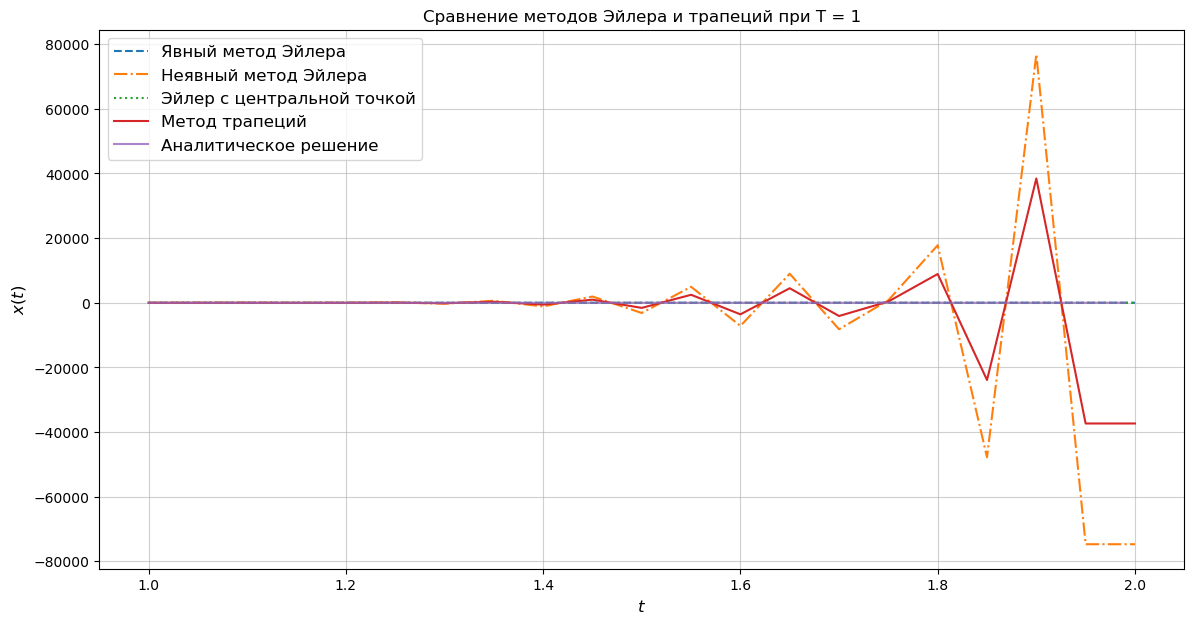

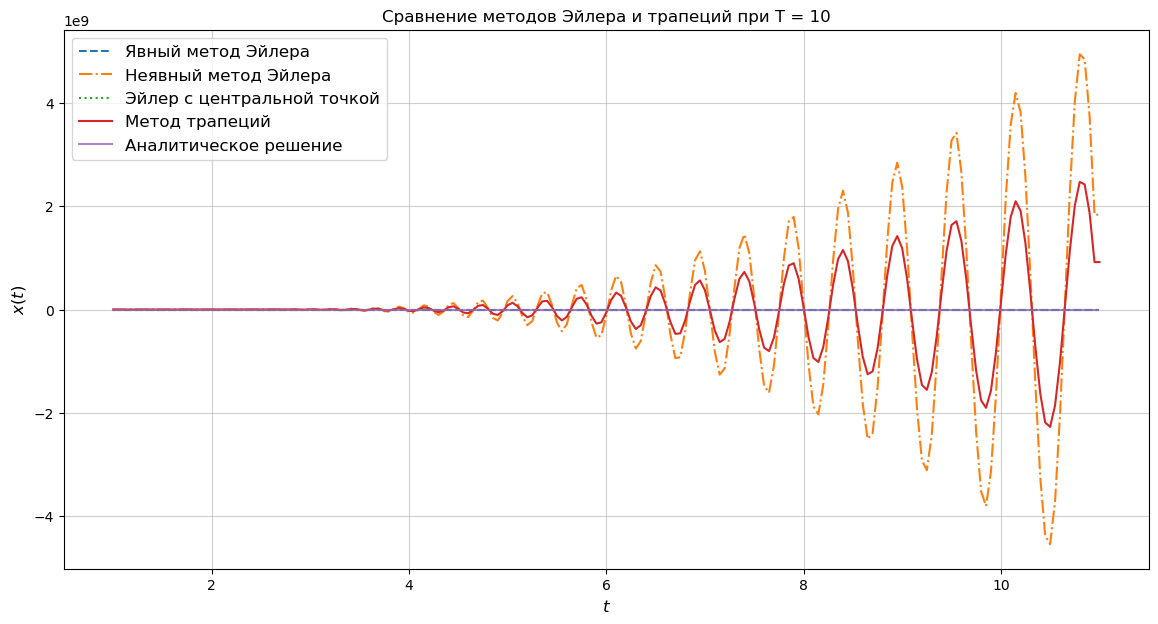

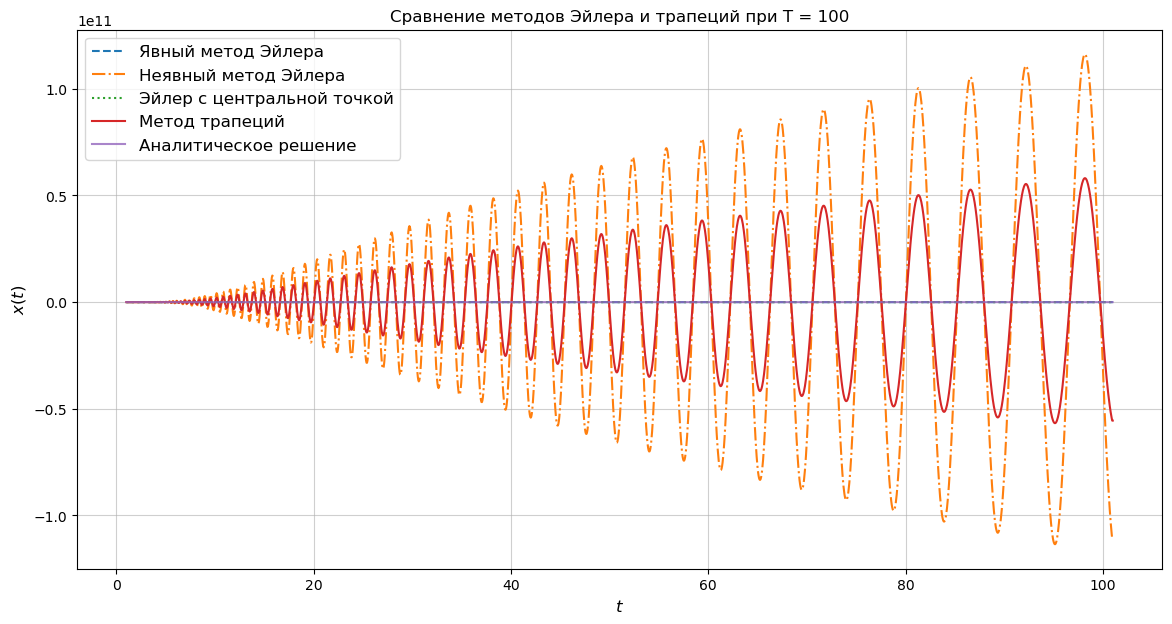

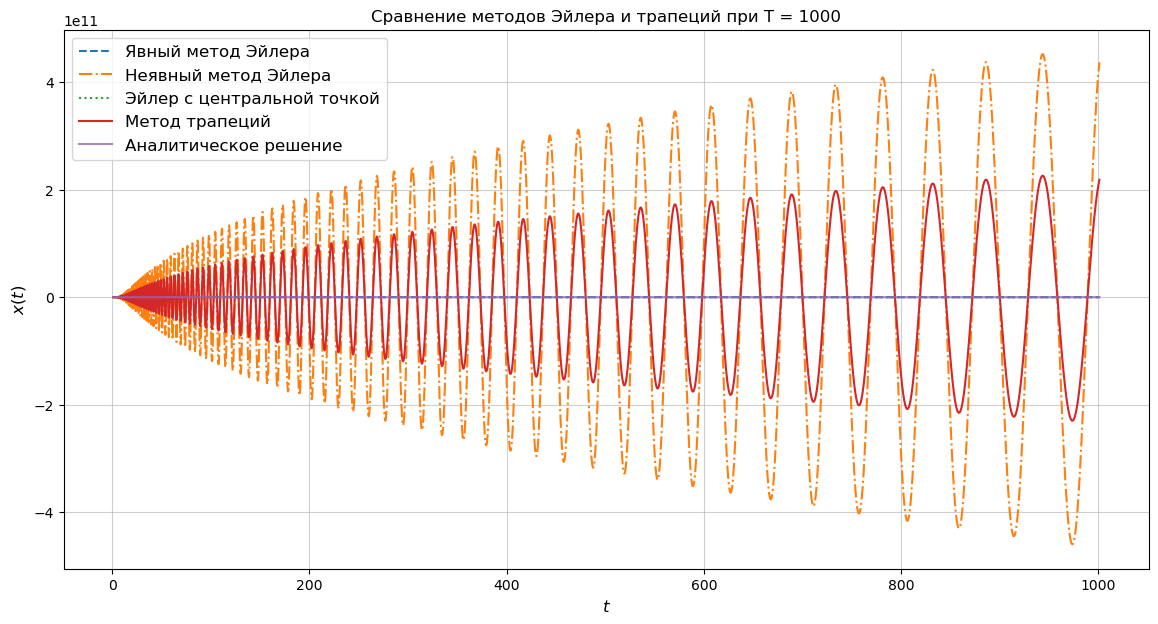

In [41]:
for t_end in t_ends:
# Решения
    t_explicit, y_explicit = explicit_euler(system, [t_start, t_end], y0, h)
    t_implicit, y_implicit = implicit_euler(system, [t_start, t_end], y0, h)
    t_midpoint, y_midpoint = midpoint_euler(system, [t_start, t_end], y0, h)
    t_trap, y_trap = trapez(system, [t_start, t_end], y0, h)
    # Построение графиков
    plt.figure(figsize=(14, 7))
    
    t = np.linspace(1, 1001, 100000)
    plt.plot(t_explicit, y_explicit[:, 0], label="Явный метод Эйлера", linestyle="--")
    plt.plot(t_implicit, y_implicit[:, 0], label="Неявный метод Эйлера", linestyle="-.")
    plt.plot(t_midpoint, y_midpoint[:, 0], label="Эйлер с центральной точкой", linestyle=":")
    plt.plot(t_trap, y_trap[:, 0], label="Метод трапеций", linestyle="-")
    plt.plot(t[t < t_end], solut(t[t < t_end]), label = 'Аналитическое решение', alpha =0.8)
   
    plt.title(f"Сравнение методов Эйлера и трапеций при Т = {t_end-t_start}")
    plt.xlabel("$t$",fontsize=12)
    plt.ylabel("$x(t)$",fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6)
    plt.show()

Видим, что амплитуда осцилляций значительно уменьшилась (с среднем на 8 порядков), но всё ещё остаётся огромной и не позволяет использовать решения методами трапеций и неявным Эйлером для приближения на промежутках.

Исключим данные методы из построения, для того чтобы пронаблюдать изменения в остальных методах

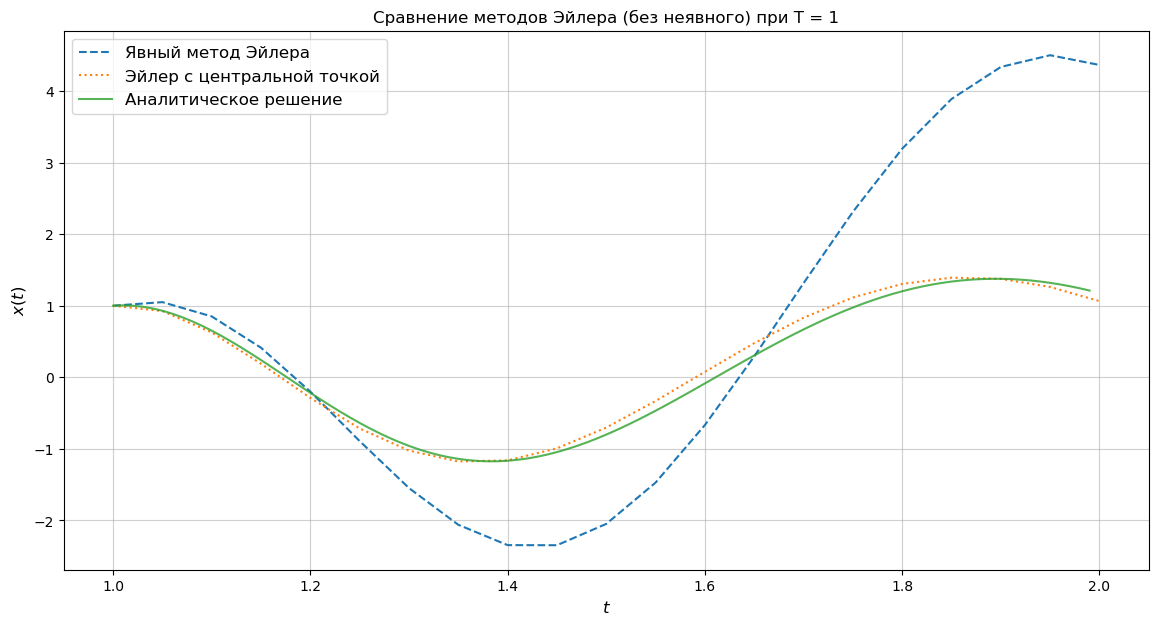

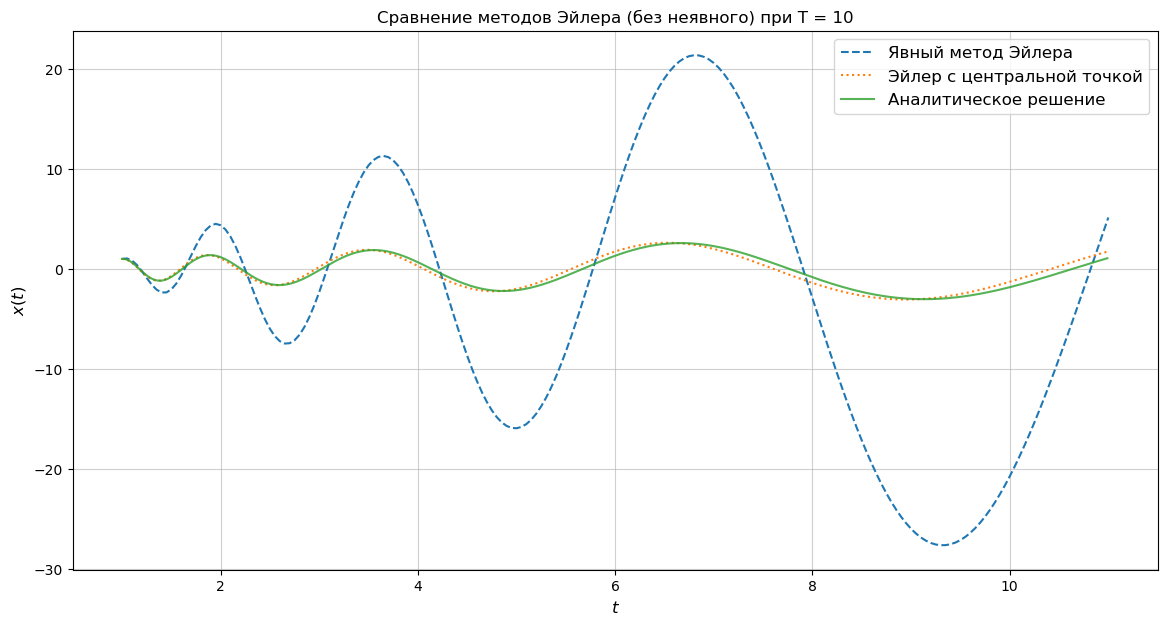

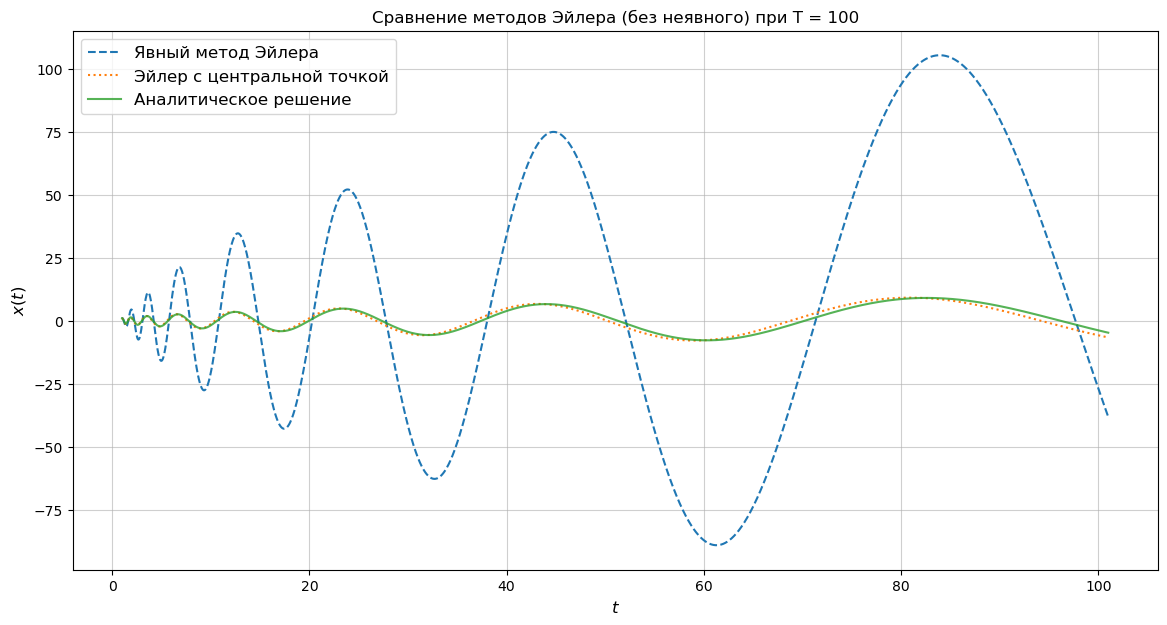

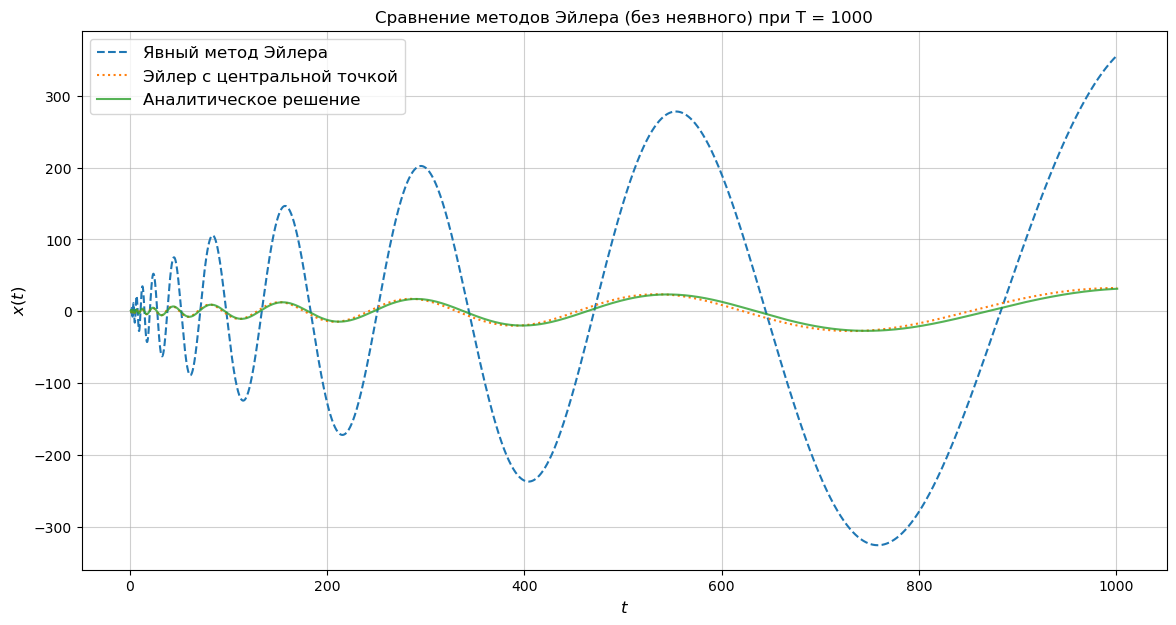

In [42]:
for t_end in t_ends:
# Решения
    t_explicit, y_explicit = explicit_euler(system, [t_start, t_end], y0, h)
    t_midpoint, y_midpoint = midpoint_euler(system, [t_start, t_end], y0, h)
    # Построение графиков
    plt.figure(figsize=(14, 7))
    
    t = np.linspace(1, 1001, 100000)
    plt.plot(t_explicit, y_explicit[:, 0], label="Явный метод Эйлера", linestyle="--")
    plt.plot(t_midpoint, y_midpoint[:, 0], label="Эйлер с центральной точкой", linestyle=":")
    plt.plot(t[t < t_end], solut(t[t < t_end]), label = 'Аналитическое решение', alpha =0.8)
   
    plt.title(f"Сравнение методов Эйлера (без неявного) при Т = {t_end-t_start}")
    plt.xlabel("$t$",fontsize=12)
    plt.ylabel("$x(t)$",fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6)
    plt.show()

Видно, что при уменьшении шага вдвое, результаты улучшились (примерно на порядок).

Построим графики численных решений методами Рунге-Кутты разных порядков для уменьшенного вдвое шага:

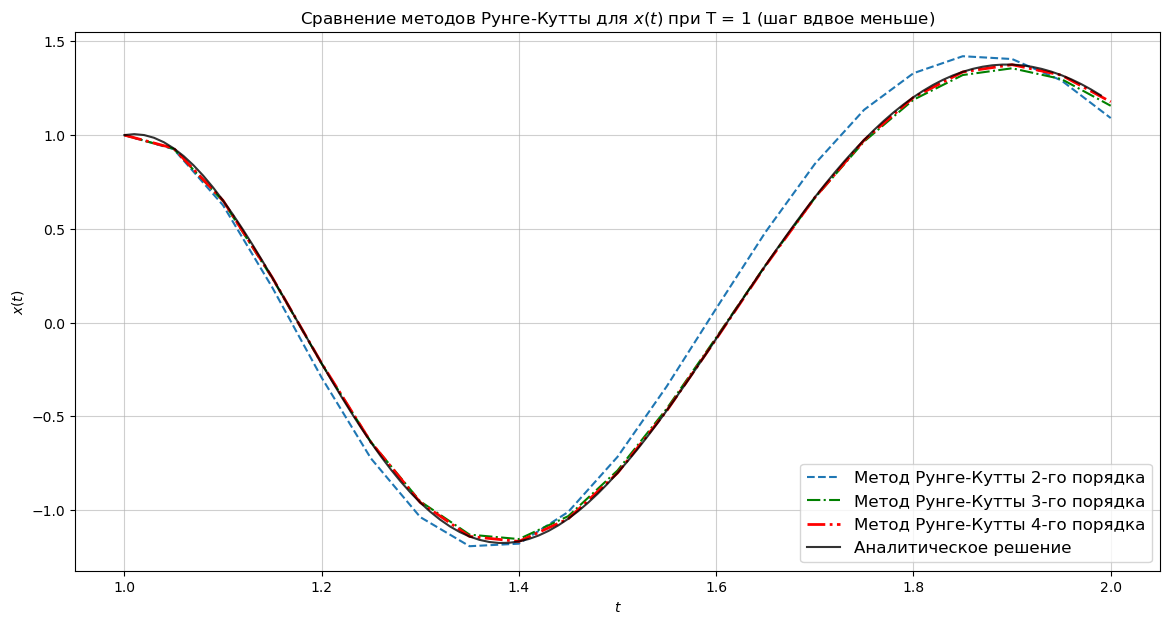

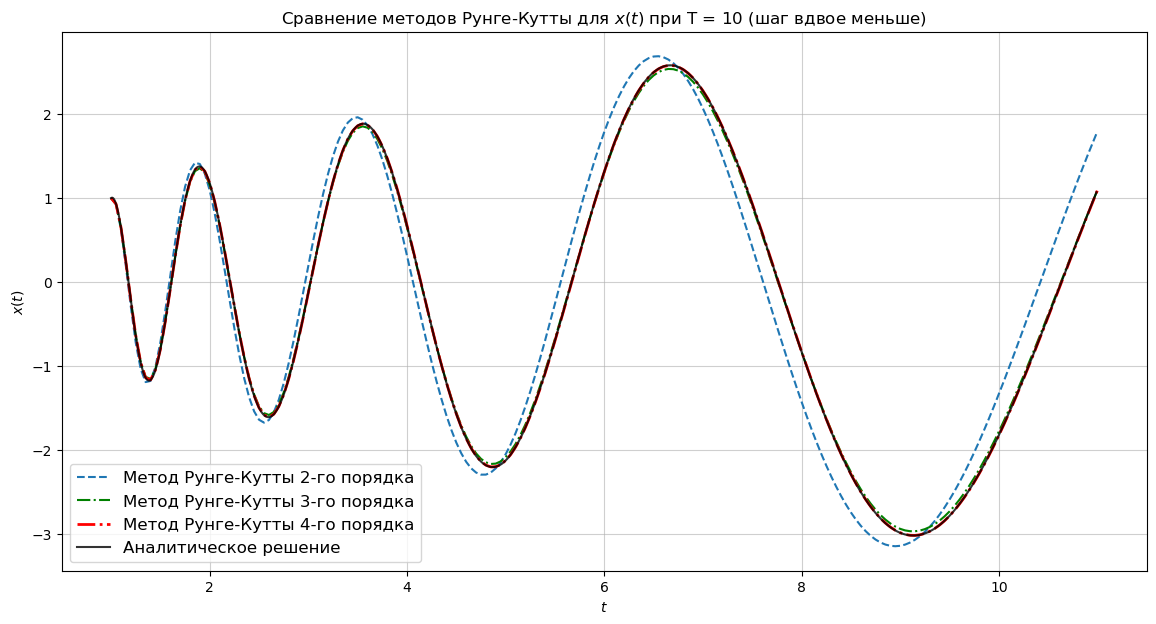

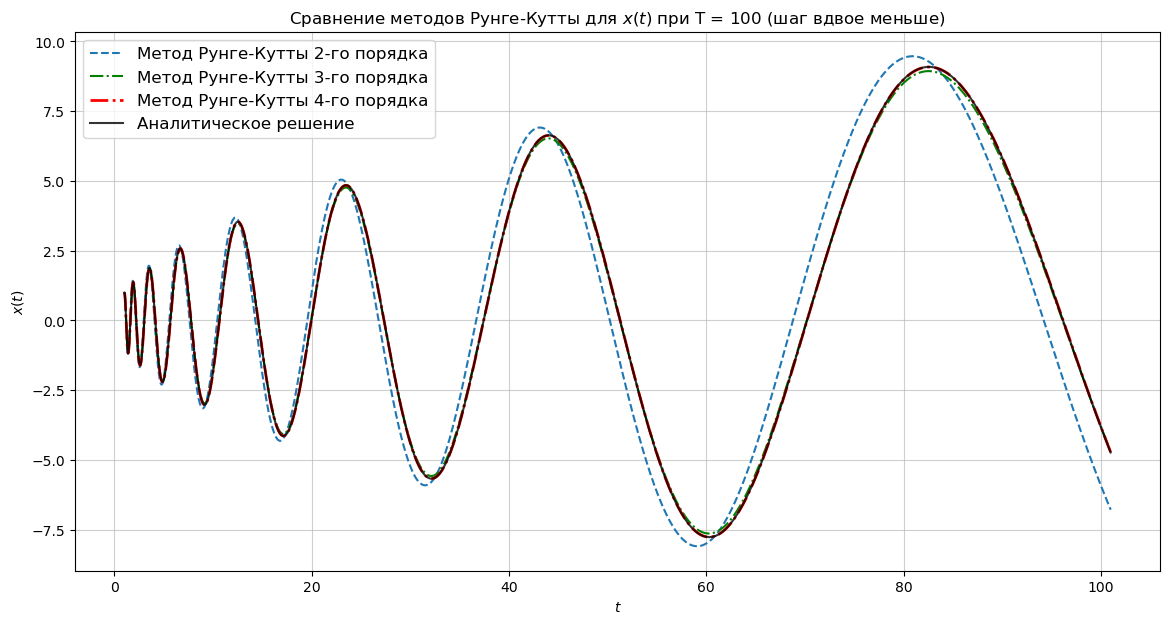

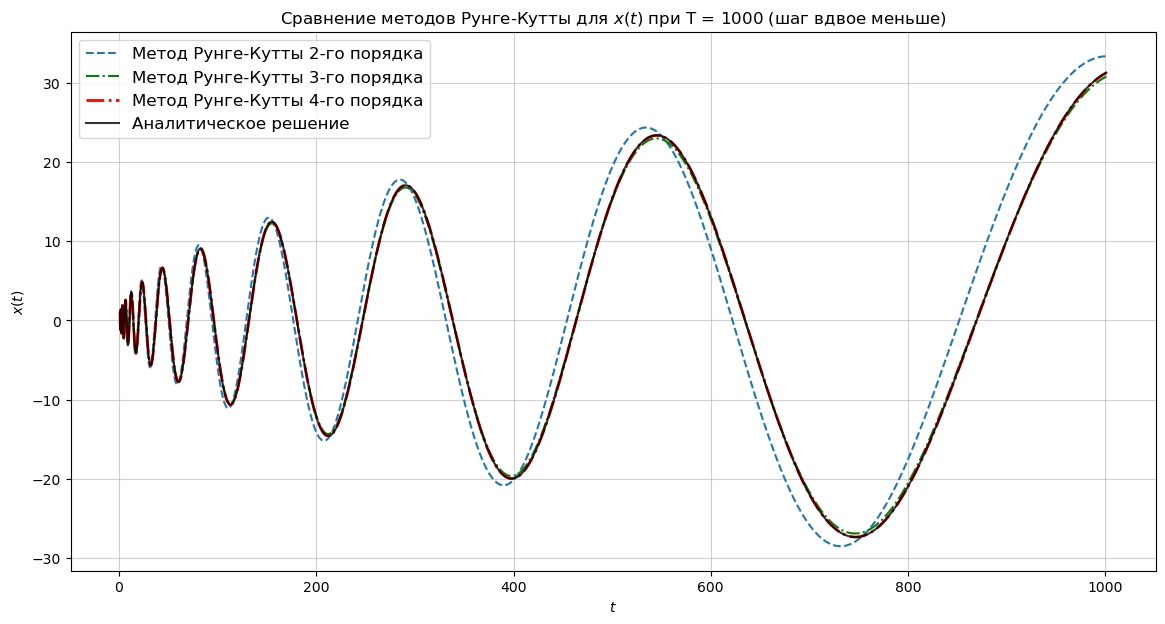

In [45]:
for t_end in t_ends:
    t_rk2, y_rk2 = runge_kutta_2(system, [t_start, t_end], y0, h)
    t_rk3, y_rk3 = runge_kutta_3(system, [t_start, t_end], y0, h)
    t_rk4, y_rk4 = runge_kutta_4(system, [t_start, t_end], y0, h)
    # Построение графиков
    plt.figure(figsize=(14, 7))

    plt.plot(t_rk2, y_rk2[:, 0], label="Метод Рунге-Кутты 2-го порядка", linestyle="--")
    plt.plot(t_rk3, y_rk3[:, 0], label="Метод Рунге-Кутты 3-го порядка", linestyle="-.", color='green')
    plt.plot(t_rk4, y_rk4[:, 0], label="Метод Рунге-Кутты 4-го порядка", linestyle="dashdot",color='red', lw=2)
    plt.plot(t[t < t_end], solut(t[t < t_end]), label = 'Аналитическое решение', alpha =0.8, color='black')

    plt.title(f"Сравнение методов Рунге-Кутты для $x(t)$ при Т = {t_end - t_start} (шаг вдвое меньше)")
    plt.xlabel("$t$")
    plt.ylabel("$x(t)$")
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6)
    plt.show()

Графики погрешностей при разных $T$:

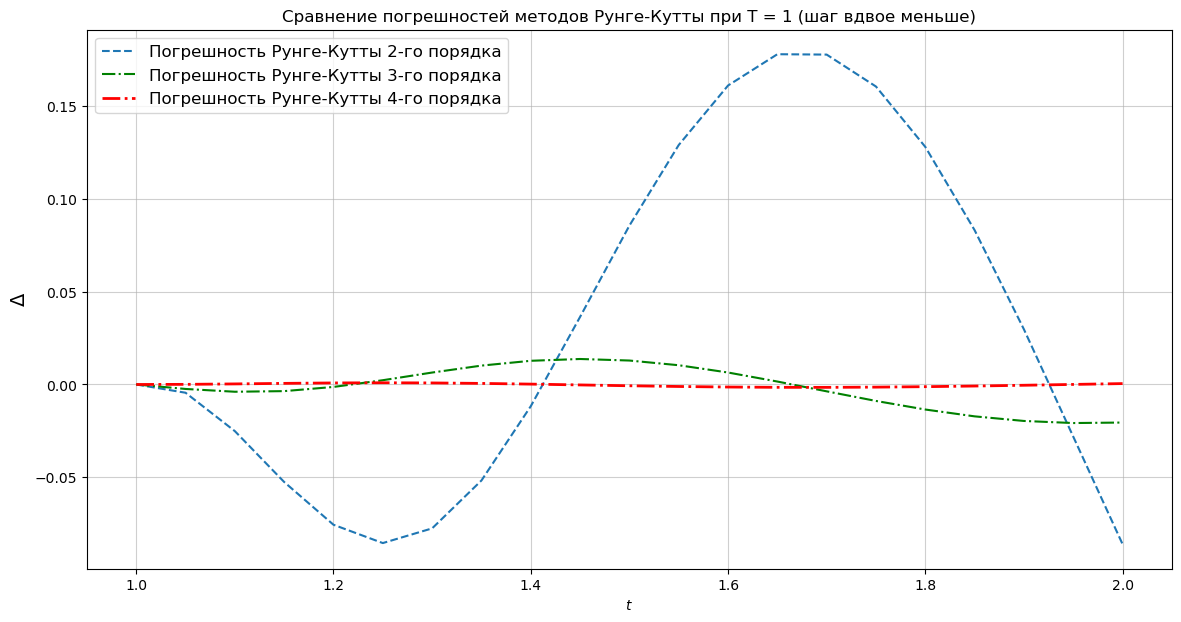

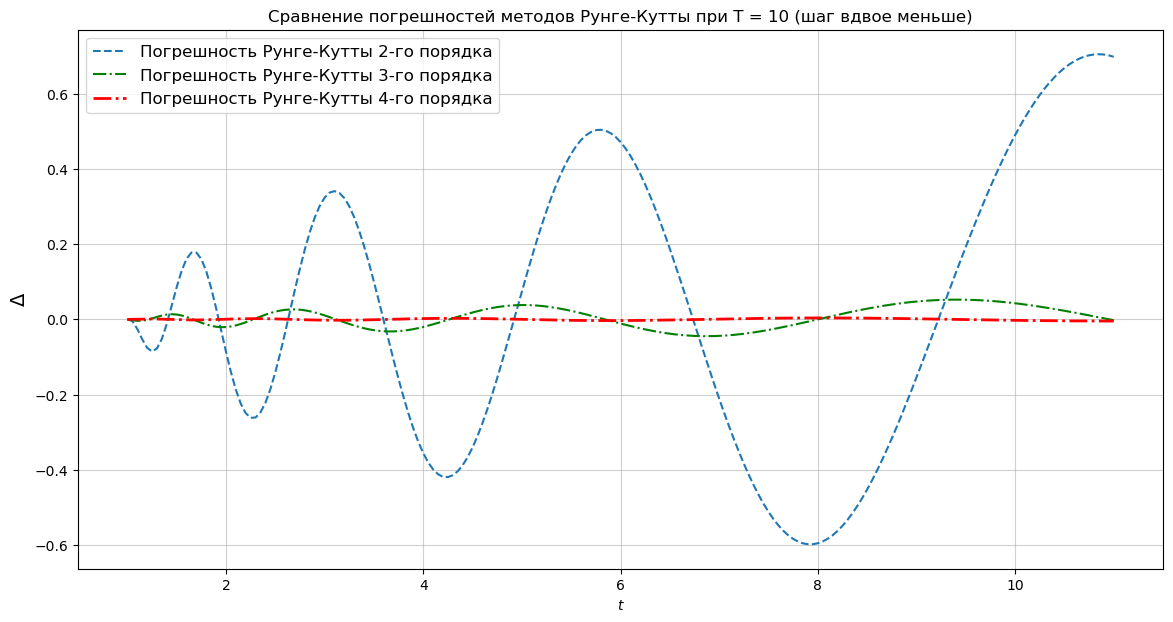

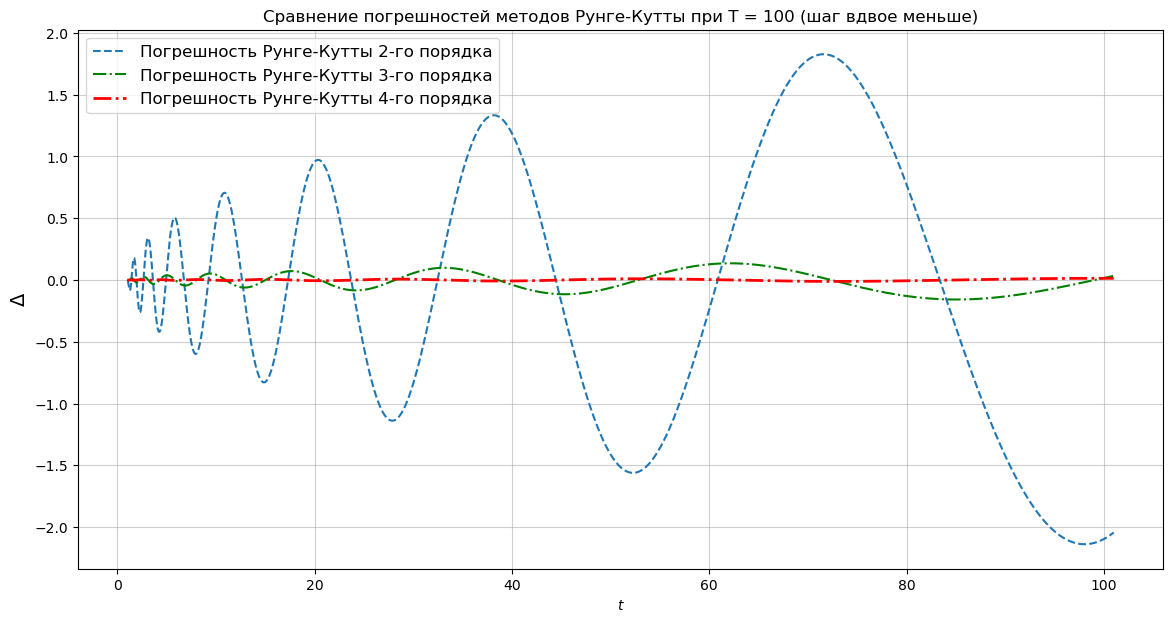

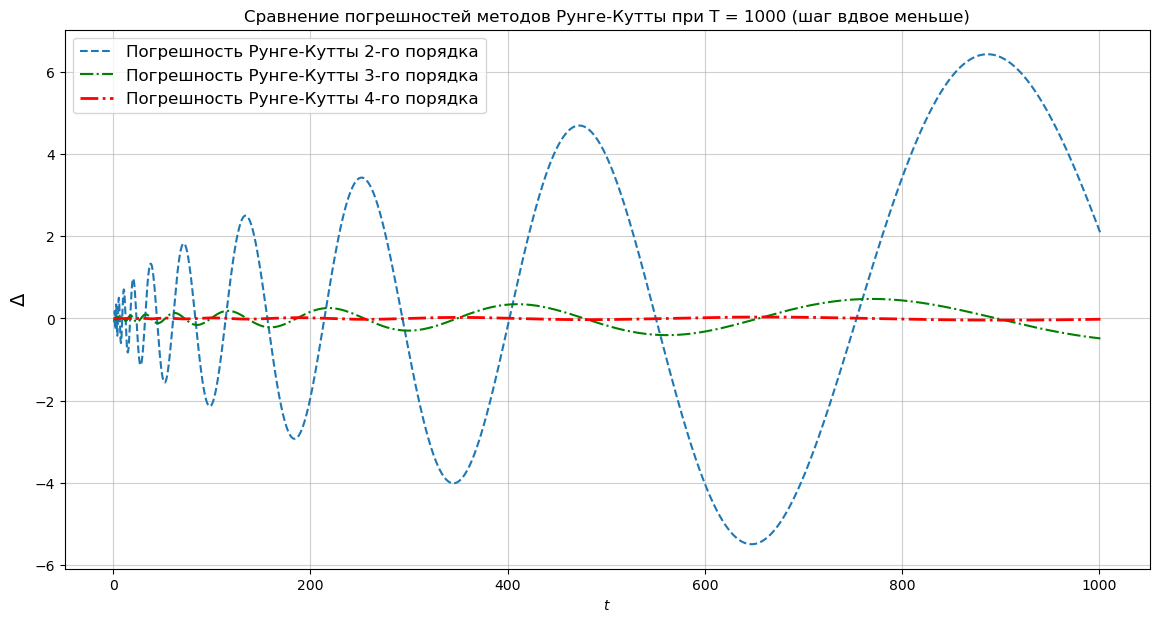

In [44]:
for t_end in t_ends:
    t_rk2, y_rk2 = runge_kutta_2(system, [t_start, t_end], y0, h)
    t_rk3, y_rk3 = runge_kutta_3(system, [t_start, t_end], y0, h)
    t_rk4, y_rk4 = runge_kutta_4(system, [t_start, t_end], y0, h)
    # Построение графиков
    plt.figure(figsize=(14, 7))

    plt.plot(t_rk2, (y_rk2[:, 0] - solut(t_rk2)), label="Погрешность Рунге-Кутты 2-го порядка", linestyle="--")
    plt.plot(t_rk3, (y_rk3[:, 0] - solut(t_rk3)), label="Погрешность Рунге-Кутты 3-го порядка", linestyle="-.", color='green')
    plt.plot(t_rk4, (y_rk4[:, 0] - solut(t_rk4)), label="Погрешность Рунге-Кутты 4-го порядка", linestyle="dashdot",color='red', lw=2)

    plt.title(f"Сравнение погрешностей методов Рунге-Кутты при Т = {t_end - t_start} (шаг вдвое меньше)")
    plt.xlabel("$t$")
    plt.ylabel("$\Delta$", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6)
    plt.show()

Принципиальных изменений при уменьшении шага не наблюдается, но погрешность снизилась примерно в 3-4 раза для различных порядков, так что начальный шаг был неоптимальным.

Посмотрим на изменения в решении методом Дормана-Приинса:

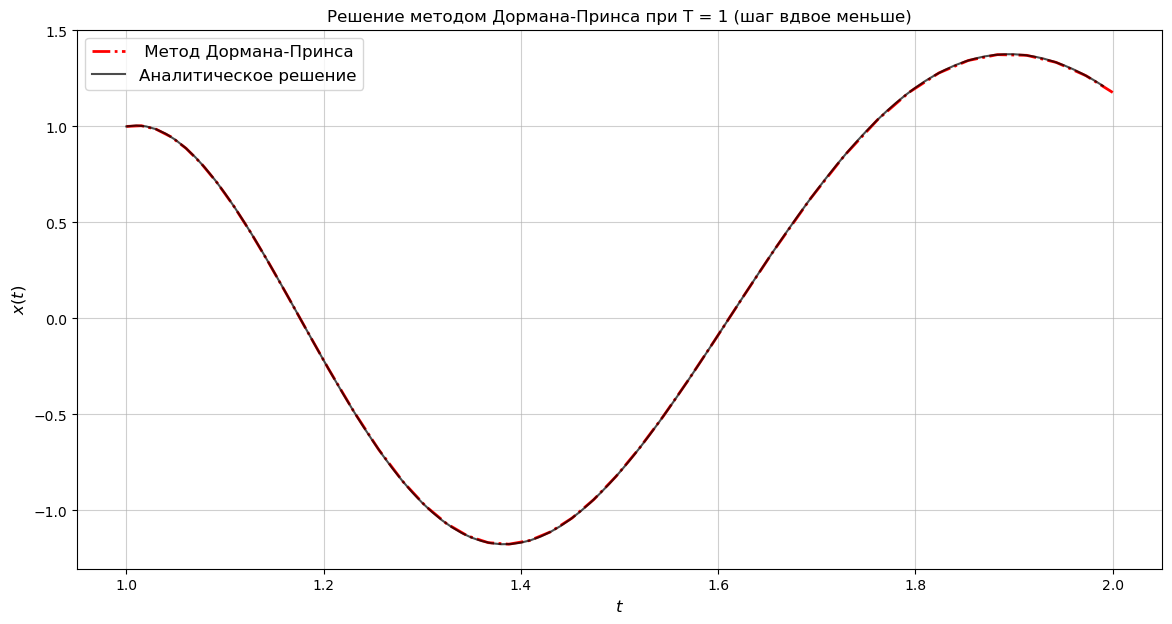

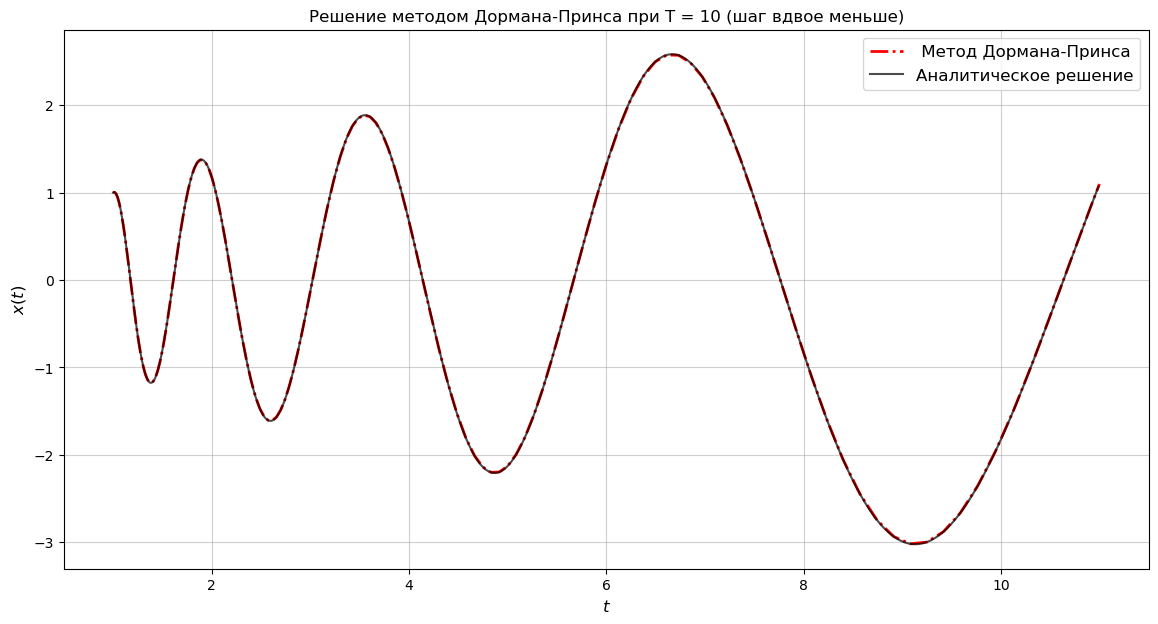

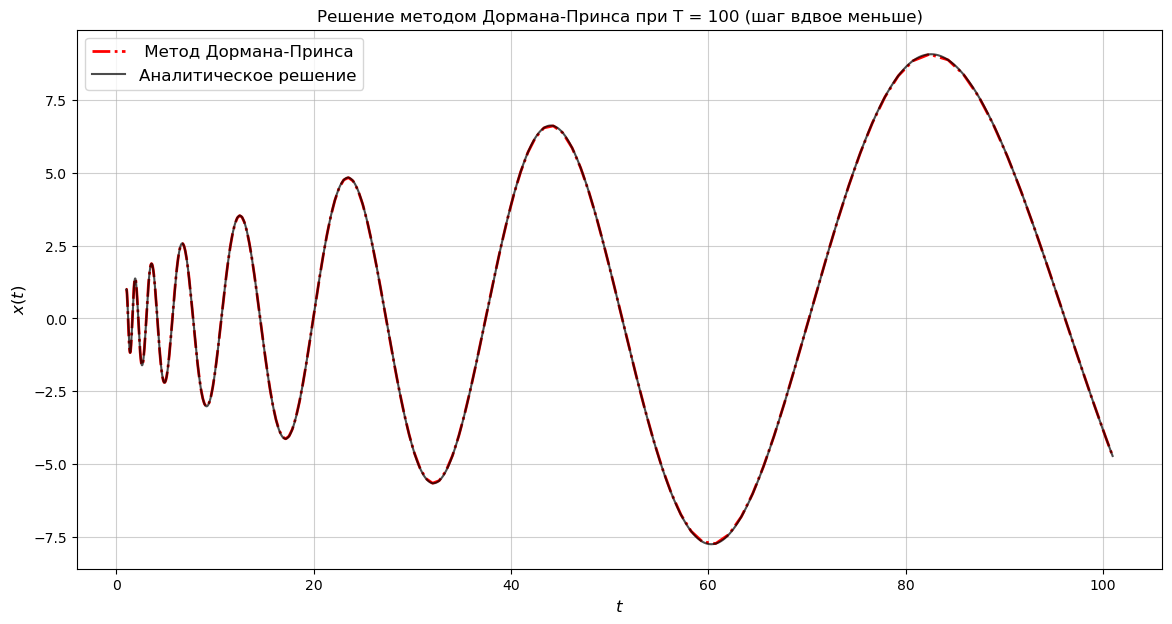

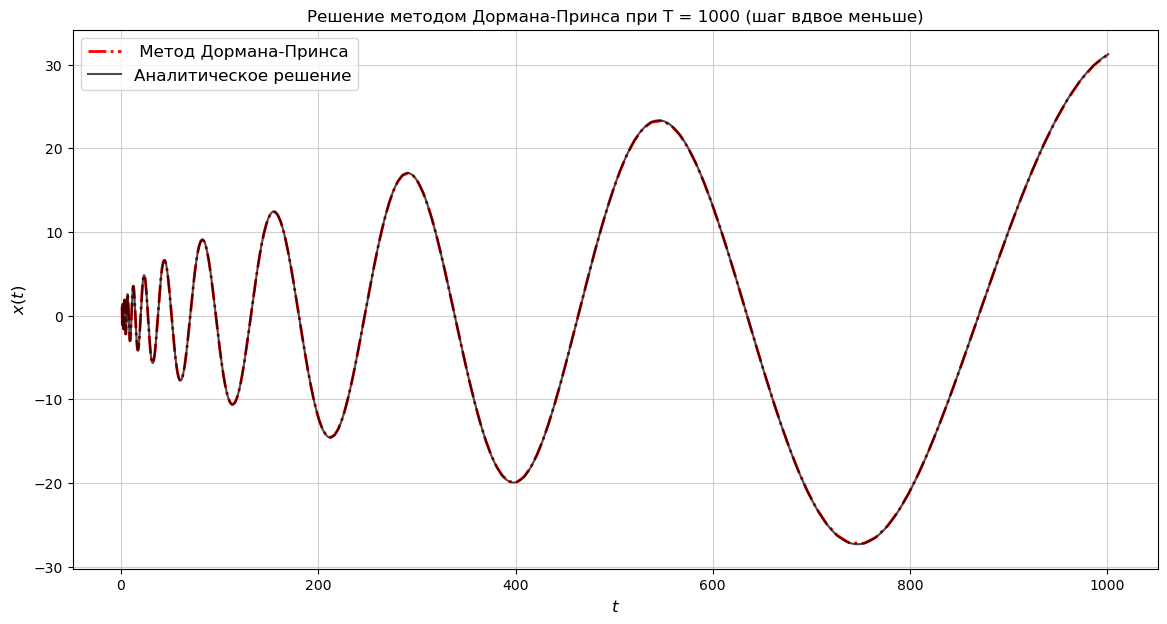

In [46]:
for t_end in t_ends:
    t_dp, y_dp = dormand_prince(system, [t_start, t_end], y0, h)
    # Построение графиков
    plt.figure(figsize=(14, 7))

    plt.plot(t_dp, y_dp[:, 0], label=" Метод Дормана-Принса", linestyle="dashdot",color='red', lw=2)
    plt.plot(t[t < t_end], solut(t[t < t_end]), label = 'Аналитическое решение', color='black', alpha=0.7)

    plt.title(f"Решение методом Дормана-Принса при Т = {t_end - t_start} (шаг вдвое меньше)")
    plt.xlabel("$t$", fontsize=12)
    plt.ylabel("$x(t)$", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6)
    plt.show()

Приницпиальных изменений нет, данный метод визуально так же идеально приближает аналитическое решение. Построим график погрешности такого решения:

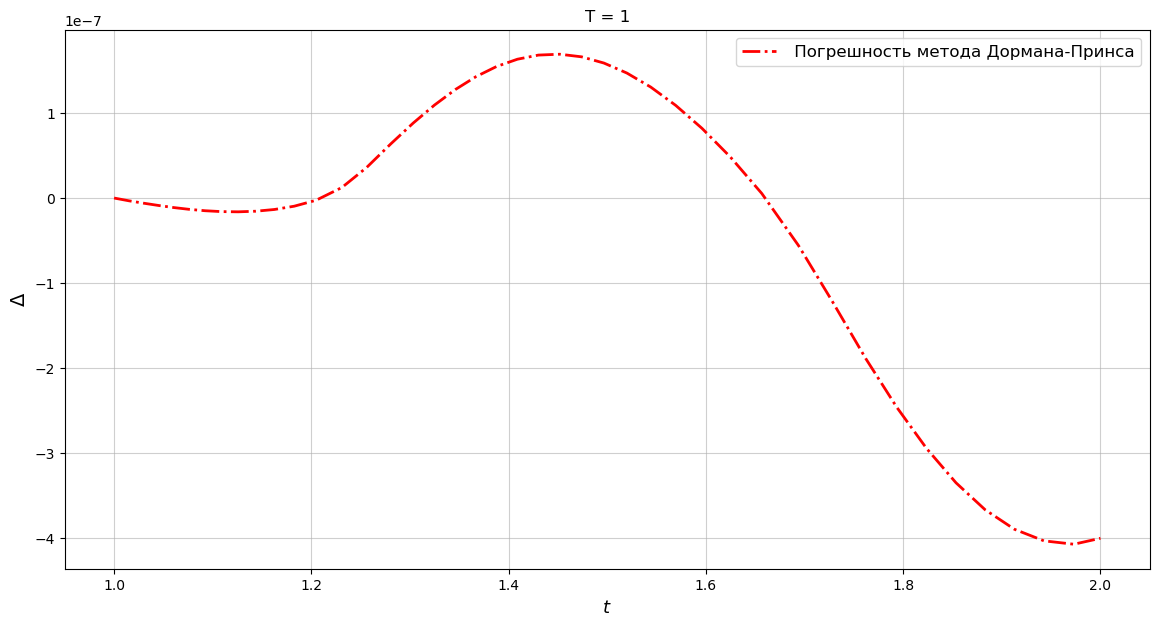

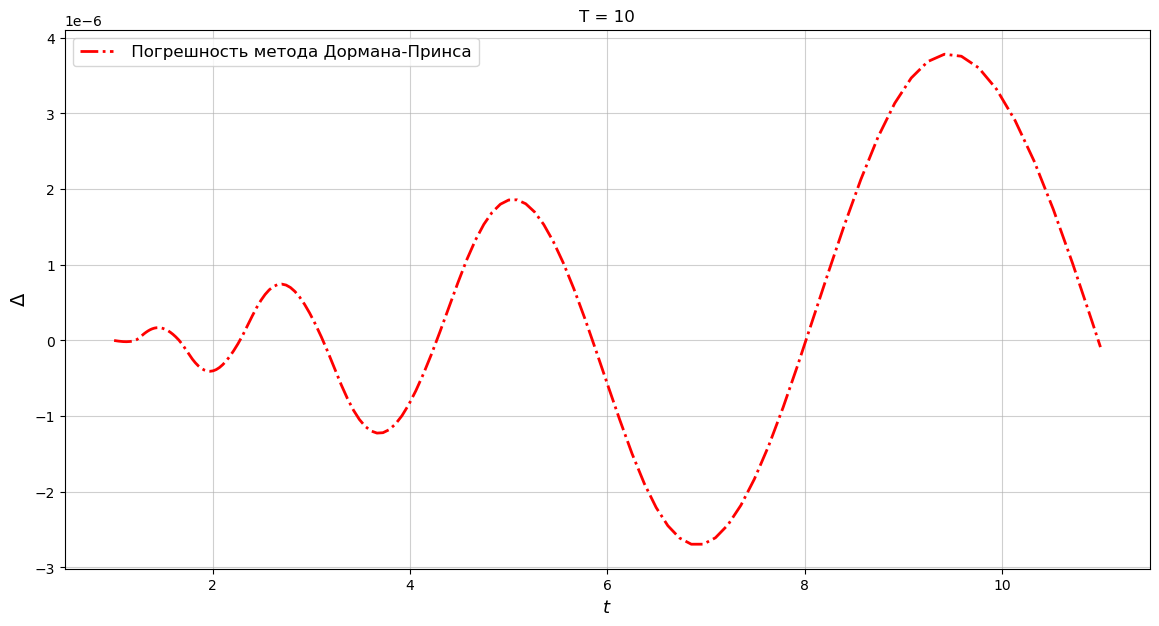

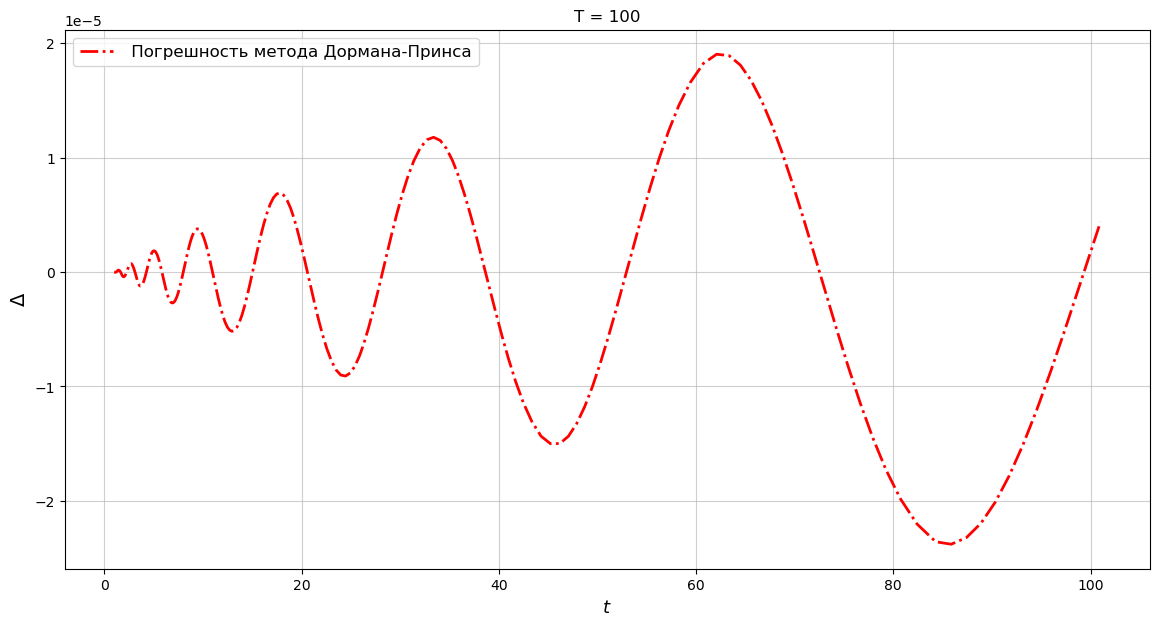

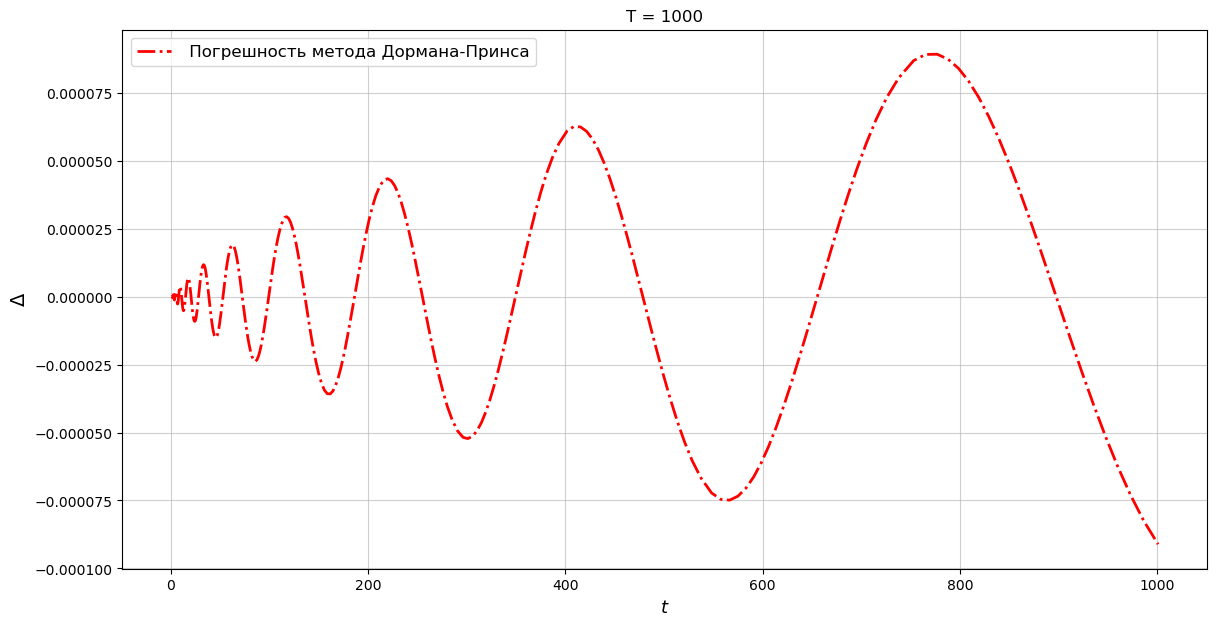

In [49]:
for t_end in t_ends:
    t_dp, y_dp = dormand_prince(system, [t_start, t_end], y0, h)
    # Построение графиков
    plt.figure(figsize=(14, 7))

    plt.plot(t_dp, (y_dp[:, 0] - solut(t_dp)), label=" Погрешность метода Дормана-Принса", linestyle="dashdot",color='red', lw=2)

    plt.title(f"Т = {t_end - t_start}")
    plt.xlabel("$t$", fontsize=13)
    plt.ylabel("$\Delta$", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6)
    plt.show()

Изменения при уменьшении шага:
* В случае методов Эйлера амплитуда осцилляций снизилась на 8 порядков, но всё ещё остаётся крайне значительной 
* В случае Методов Рунге-Кутты решения стали приближать аналитическое лучше. Численное решение второго порядка стало "запаздывать" меньше, для 3 и 4 порядковпринципиальных различий не наблюлается.
* Для метода Дормана-Принса не наблюдается вообще никаких изменений и значения ошибки остались теми же 

**Исследование метода трапеций на устойчивость. Априорная оценка для шагов при которых метод устойчив**

Стоит заметить, что данный метод совпадает с одной из вариаций метода Рунге-Кутты 2 порядка и, следовательно, обладает вторым порядком аппроксимации. Он определяется выражением:
$$
y^{n+1} = y^n + \tau \lambda y^n + \frac{\tau^2 \lambda^2 y^n}{2}
$$
Таки образом устойчивость будет наблюдаться при $R = 1 + \lambda \tau + \frac{\lambda^2 \tau^2}{2}<1$, то есть $\lambda \tau< 2$.

Решая характеристическое уравнение системы: 
$$\lambda^2 - \frac{100}{t^2} = 0$$
Получаем, что $|\lambda_{12}| = \frac{\sqrt{100}}{t}$

Тогда рассматриваемый метод будет устойчивым, если $\tau< \frac{2 t}{\sqrt{100}} = 0,2$

Посмотрим на зависимость накопления ошибки от величины шага:

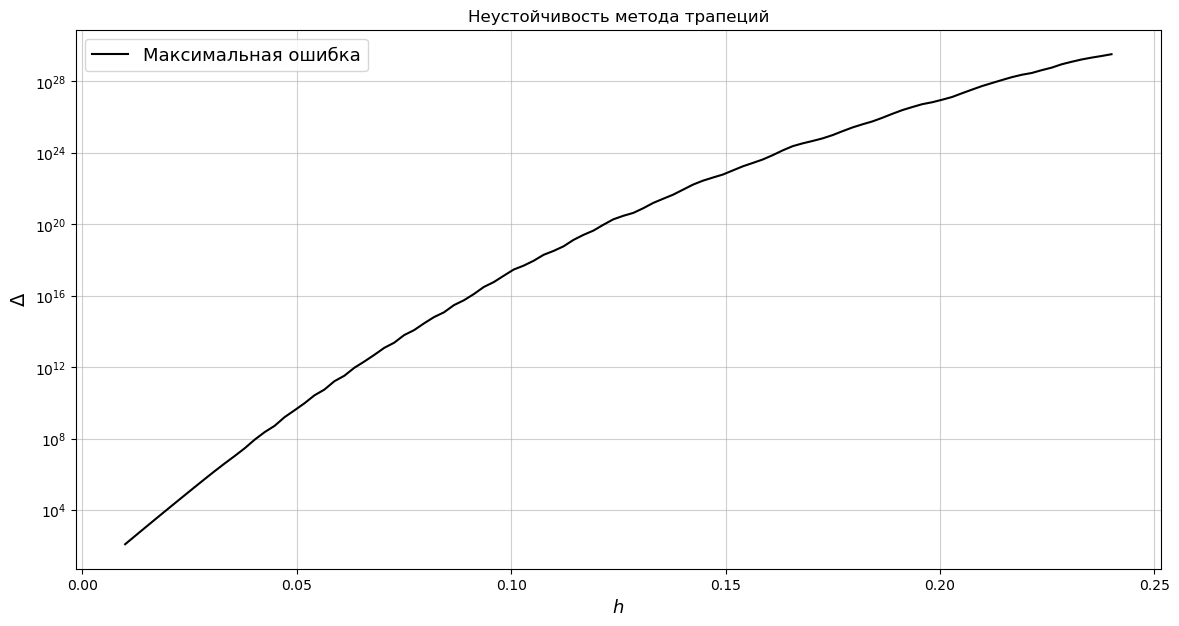

In [175]:
hs = np.linspace(0.01, 0.24, 100)
errors = []
for h in hs:
    t_trap, y_trap = trapez(system, [1, 101], y0, h)
    errors.append(np.mean(abs(solut(t_trap) - y_trap[:, 0])))


plt.figure(figsize=(14, 7))

plt.plot(hs, errors, label = 'Максимальная ошибка', color='black')

plt.title(f"Неустойчивость метода трапеций")
plt.xlabel("$h$", fontsize=13)
plt.ylabel("$\Delta$", fontsize=14)
plt.yscale('log')
plt.legend(fontsize=13)
plt.grid(alpha=0.6)
plt.show()

Судя по полученным результатам, можно сказать, что оценка шага при котром наблюдается устойчивость сильно завышена. 

**Устойчивость метода Эйлера с центральной точкой:**

Запишем разностную схему, устойчивость которой мы будем исследовать:
$$
\frac{y^{n+1} - y^{n-1}}{2\tau} = f(t_n, y^n)
$$
Для данной схемы предположим, что для собственных значений оператора перехода λ последовательные значения y связаны равенством:
$$
y^{n+1} = \lambda y^n; ~~~~ y^n = \lambda y^{n-1}
$$
Подставим данные выражения в разностный оператор и скоратим на $y^{n-1}$. Таким образом мы получаем квадратное уравнение на $\lambda$:
$$ \lambda^2 -2\tau \frac{\partial f} {\partial u}\lambda - 1 = 0$$

Пользуясь теоремой Виета получаем, что $\lambda_1\lambda_2 = -1$ Дискриминант данного уравнения: $D = 4\tau^2(f'_u)^2  +4  \in \mathbb{R}$, таким образом данная разностная схема строгой устойчивостью обладать не может.

Нестрогой устойчивости метода можно добиться при ограниченной производной: 

$|\lambda_{1,2}| \leq 1 + c\cdot \tau$, где $c = 2 \frac{\partial f} {\partial u}$

Рассмотрим детальнее численное решение данным методом при шаге $\tau = 0.1$


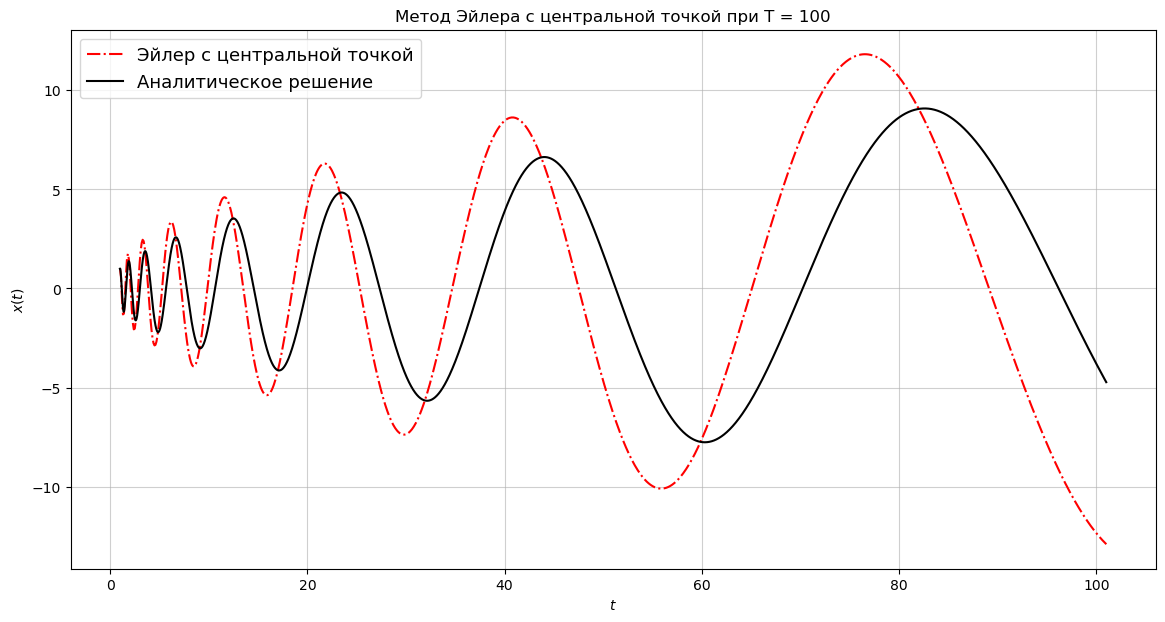

In [ ]:
t_start = 1
t_end = 101
y0 = [1, 1] 
h = 0.1

t_midpoint, y_midpoint = midpoint_euler(system, [t_start, t_end], y0, h)
# Построение графиков
plt.figure(figsize=(14, 7))

t = np.linspace(1, 1001, 100000)
plt.plot(t_midpoint, y_midpoint[:, 0], label="Эйлер с центральной точкой", linestyle="dashdot", color='red')
plt.plot(t[t < t_end], solut(t[t < t_end]), label = 'Аналитическое решение', color='black')

plt.title(f"Метод Эйлера с центральной точкой при Т = {t_end-t_start}")
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.legend(fontsize=13)
plt.grid(alpha=0.6)
plt.show()

Посмотрим на зависимость максимальной ошибки данного метода от шага $h$ при $t\in [1;100]$

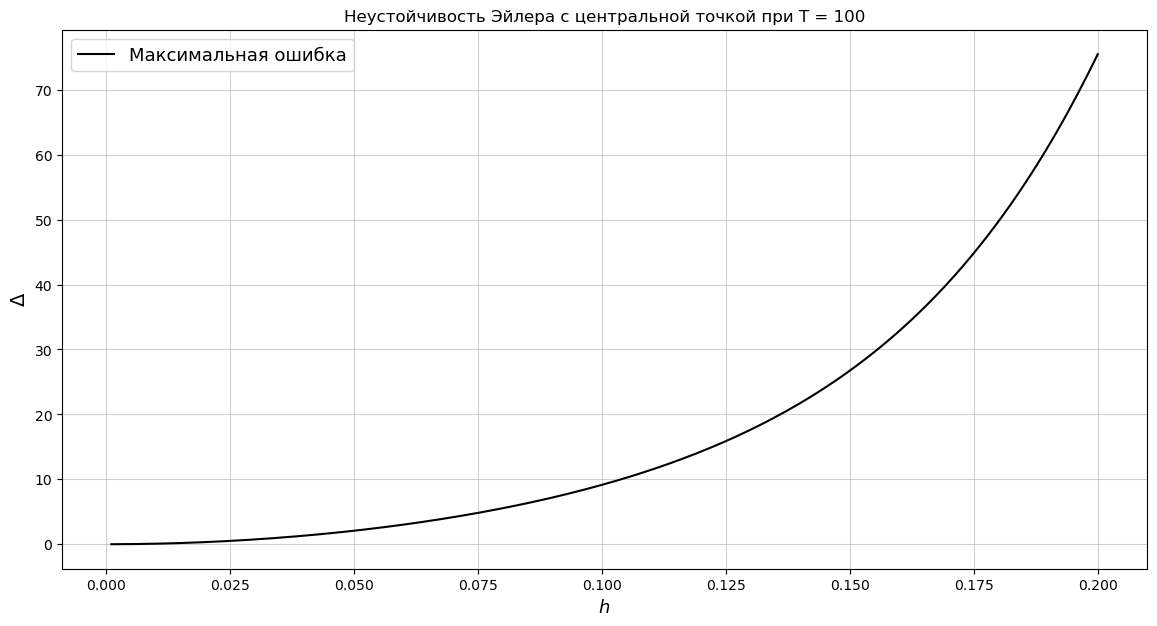

In [27]:
hs = np.linspace(0.001, 0.2, 300)
errors = []
for h in hs:
 t_midpoint, y_midpoint = midpoint_euler(system, [t_start, t_end],
y0, h)
 errors.append(max(abs(solut(t_midpoint) - y_midpoint[:, 0])))


plt.figure(figsize=(14, 7))

plt.plot(hs, errors, label = 'Максимальная ошибка', color='black')

plt.title(f"Неустойчивость Эйлера с центральной точкой при Т = {t_end-t_start}")
plt.xlabel("$h$", fontsize=13)
plt.ylabel("$\Delta$", fontsize=14)
plt.legend(fontsize=13)
plt.grid(alpha=0.6)
plt.show()

На данном графике видно, что накопление ошибки происходит достаточно быстро уже при $h=0.05$. Рассмотрим другие интервалы интервал $t$

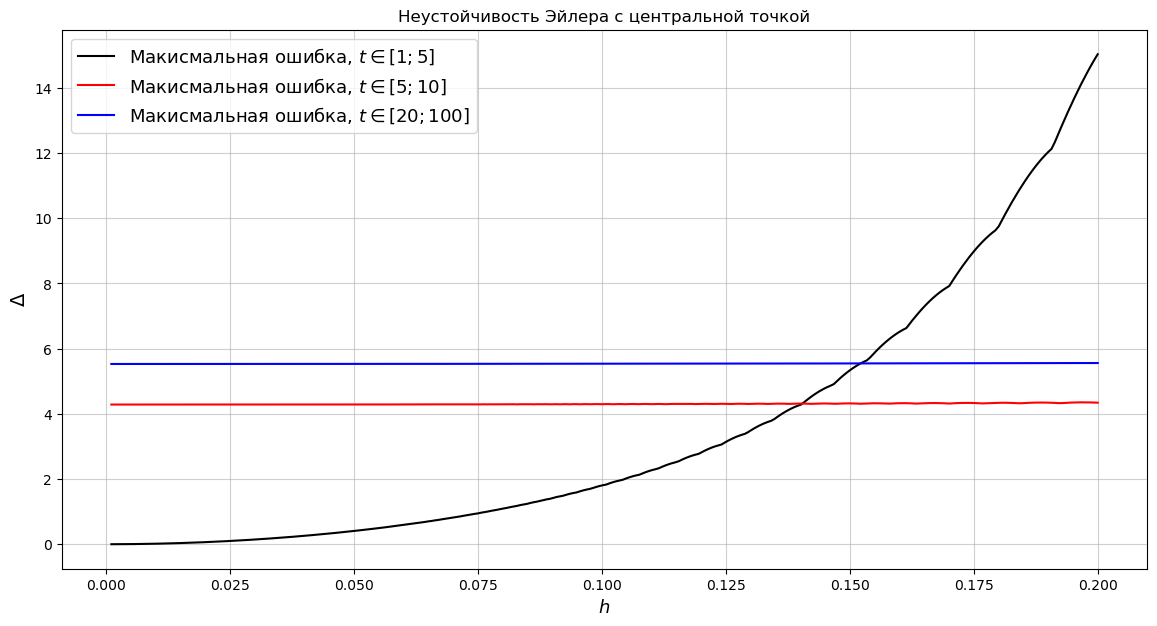

In [45]:
t_start1 = 1
t_end1 = 5
y0 = [1, 1] 

t_start2 = 5
t_end2 = 10

t_start3 = 20
t_end3 = 100

hs = np.linspace(0.001, 0.2, 300)
errors1 = []
errors2 = []
errors3 = []
for h in hs:
 t_midpoint, y_midpoint = midpoint_euler(system, [t_start1, t_end1], y0, h)
 errors1.append(max(abs(solut(t_midpoint) - y_midpoint[:, 0])))
 t_midpoint, y_midpoint = midpoint_euler(system, [t_start2, t_end2], y0, h)
 errors2.append(max(abs(solut(t_midpoint) - y_midpoint[:, 0])))
 t_midpoint, y_midpoint = midpoint_euler(system, [t_start3, t_end3], y0, h)
 errors3.append(max(abs(solut(t_midpoint) - y_midpoint[:, 0])))


plt.figure(figsize=(14, 7))

plt.plot(hs, errors1, label = f'Макисмальная ошибка, $t\in[{t_start1}; {t_end1}]$', color='black')
plt.plot(hs, errors2, label = f'Макисмальная ошибка, $t\in[{t_start2}; {t_end2}]$', color='red')
plt.plot(hs, errors3, label = f'Макисмальная ошибка, $t\in[{t_start3}; {t_end3}]$', color='blue')

plt.title(f"Неустойчивость Эйлера с центральной точкой")
plt.xlabel("$h$", fontsize=13)
plt.ylabel("$\Delta$", fontsize=14)
plt.legend(fontsize=13)
plt.grid(alpha=0.6)
plt.show()

На полученном графике видно, что при малых $t$ с увеличением $h$ происходит быстрое накопление ошибки и метод перестаёт быть устойчивым, что согласуется с теоретическими выкладками выше. При этом если взять отрезки $t$, которые не захватывают малые значения, то макимальная ошибка не увеличивается с ростом шага.

 На самом деле данный результат как раз и ожидался и иллюстрирует условную устойчивочть метода. Посмотрим на поризводную правой части системы по решению::
$$
J = \begin{pmatrix}
0 & 1 \\
-\frac{100}{t^2} & 0
\end{pmatrix}
$$

При увеличении значения $t$ норма данной производной $\|J \|$ уменьшается и мы моем ограничить её всё меньшим значением $c$, что приводит к уменьшению накопления ошибки

### Выводы по задаче:
* Методы Эйлера (кроме неявного) показывают неплохие результаты, но только при малых значениях $t$, лучше всего приближает точное решение метод Эйлера с центральной точкой.
* Методы Рунге-Кутты всех порядков достаточно точно приближают аналитическое решение и с ростом порядка эта точность увеличивается. При уменьшении шага вдвое точность также растёт.
* Метод Дормана-Принса идеально приближает точное решение и является самым точным из рассмотренных в данной задаче методов. Даже при $T=1000$ не наблюдается накопления ошибки более чем в $10^{-4}$ (относительная ошибка $\approx 10^{-6}$), что является очень хорошим результатом
* Метод Эйлера с центральной точкой не является строго устойчивым, но при рассмотрении промежутка на достаточно больших значениях $t>10$, накопление ошибки прекращается что связанно с ограниченностью производной правой части системы по решению.

В целом в данной задаче были рассмотрены разные методы численного решения задачи Коши для ОДУ, некоторые из которых (Мтоды Рунге-Кутты 3-4 порядков, метод Дормана-Принса) можно считать очень перспективными.

## Задача №2. Нелинейная система уравнений. Уравнение Ван-дер-Поля

$$
y'' + a(y^2  -1)y' + y = 0
$$
$$ y(0) = y_0 >0; ~~~ y'(0)=0; ~~~ 0\leq t \leq 30; ~~~ a\in[100; 1000] $$

Данное уравние описывает нелинейные колебания в различных системах.
* Проинтегрировать численно явными методам Рунге-Кутты с числом стадий 2,3,4

Для решения задачи нам необходимо преобразовать данное уравнение 2 порядка в систему 2х уравнений первого порядка. Используем представление:
$$
\begin{cases}
y' = p \\
p' = ap(1-y^2) - y
\end{cases}
$$

Запишем таблицы Бутчера для явных методов Рунге-Кутты всех порядков:
* Рунге-Кутты 2 порядка:

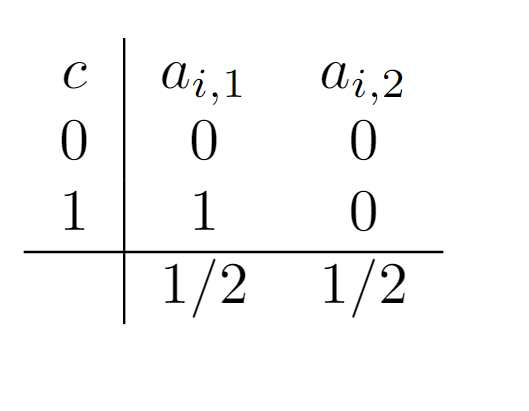

* 3 порядка:

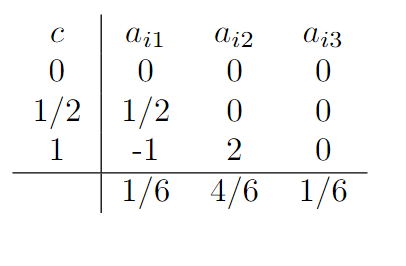

* 4 порядка:

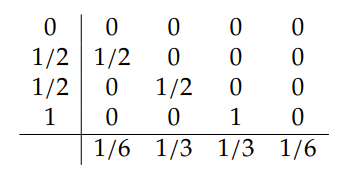

Используя полученные в прошлой задаче результаты возьмём в качестве точного решения численное решение методом Дормана-Принса. Реализуем его для данной задачи:


In [ ]:
def dormand_prince_with_params(system, t_span, y0, p0, h, tol=1e-6):
    y0 = np.atleast_1d(y0)
    p0 = np.atleast_1d(p0)

    # Коэффициенты метода Дормана-Принса
    c = [0, 1/5, 3/10, 4/5, 8/9, 1, 1]
    a = [[],[1/5], [3/40, 9/40], [44/45, -56/15, 32/9],
    [19372/6561, -25360/2187, 64448/6561, -212/729], [9017/3168, -355/33, 46732/5247, 49/176, -5103/18656], [35/384, 0, 500/1113, 125/192, -2187/6784, 11/84], ]
    b5 = [35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0]
    b4 = [5179/57600, 0, 7571/16695, 393/640, -92097/339200, 187/2100, 1/40]

    t_values = [t_span[0]]
    y_values = [y0]
    p_values = [p0]
    t, y, p = t_span[0], np.array(y0), np.array(p0)

    while t < t_span[1]:
        if t + h > t_span[1]:
            h = t_span[1] - t 

        k_y = np.zeros((7, len(y)))
        k_p = np.zeros((7, len(p)))
        for i in range(7):
            y_temp = y + sum(a[i][j] * k_y[j] for j in range(len(a[i]))) * h if i > 0 else y
            p_temp = p + sum(a[i][j] * k_p[j] for j in range(len(a[i]))) * h if i > 0 else p
            dy, dp = system(t + c[i] * h, y_temp, p_temp)
            k_y[i] = dy
            k_p[i] = dp
        y5 = y + np.dot(b5, k_y) * h
        p5 = p + np.dot(b5, k_p) * h

        y4 = y + np.dot(b4, k_y) * h
        p4 = p + np.dot(b4, k_p) * h

        error_y = np.linalg.norm(y5 - y4, ord=np.inf)
        error_p = np.linalg.norm(p5 - p4, ord=np.inf)
        error = max(error_y, error_p) # Максимальная ошибка между y и p

        if error < tol:
            t += h
            y = y5
            p = p5
            t_values.append(t)
            y_values.append(y)
            p_values.append(p)

        h = h * min(2, max(0.1, 0.9 * (tol / error)**(1/5)))

    return np.array(t_values), np.array(y_values), np.array(p_values)

Зададим параметры нашей задачи. Начальные условия: $y(0) = 1; ~~ p(0) = 0$ и параметр $a=100$

In [137]:
a = 100
y0 = 1 
p0 = 0.0 
t0, t_end = 0, 30 # границы по времени
h = 0.001

Зададим систему, полученную из уравнения Ван-дер-Поля:

In [50]:
def vdp_system(t, y, p):
    dy_dt = p
    dp_dt = a * (1 - y**2) * p - y
    return np.array([dy_dt, dp_dt])

Реализуем Явные методы Рунге-Кутты:

2 порядок:

In [79]:
def runge_kutta_2(system, t0, y0, p0, h, t_end):
    t = [t0]
    y = [y0]
    p = [p0]
    while t[-1] < t_end:
        t_curr, y_curr, p_curr = t[-1], y[-1], p[-1]

        k1 = system(t_curr, y_curr, p_curr)

        k2 = system(t_curr + h, y_curr + h * k1[0], p_curr + h *k1[1])
        
        y_next = y_curr + h * (k1[0] + k2[0]) / 2
        p_next = p_curr + h * (k1[1] + k2[1]) / 2
        t_next = t_curr + h

        t.append(t_next)
        y.append(y_next)
        p.append(p_next)
    return np.array(t), np.array(y)

3 порядка:

In [80]:
def runge_kutta_3(system, t0, y0, p0, h, t_end):

    t = [t0]
    y = [y0]
    p = [p0]

    while t[-1] < t_end:
        t_curr, y_curr, p_curr = t[-1], y[-1], p[-1]
        k1 = system(t_curr, y_curr, p_curr)
        k2 = system(t_curr + h /2, y_curr + h*k1[0]/2, p_curr + h*k1[1] / 2)
        k3 = system(t_curr + h, y_curr - h*(k1[0] - 2*k2[0]), p_curr - h * (k1[1] - 2 * k2[1]))
        y_next = y_curr + h * (k1[0] + 4 * k2[0] + k3[0]) / 6
        p_next = p_curr + h * (k1[1] + 4 * k2[1] + k3[1]) / 6
        t_next = t_curr + h
        t.append(t_next)
        y.append(y_next)
        p.append(p_next)
    return np.array(t), np.array(y)

4 порядка:

In [72]:
def runge_kutta_4(system, t0, y0, p0, h, t_end):
    t = [t0]
    y = [y0]
    p = [p0]
    while t[-1] < t_end:
        t_curr, y_curr, p_curr = t[-1], y[-1], p[-1]

        k1 = system(t_curr, y_curr, p_curr)
        k2 = system(t_curr + h / 2, y_curr + h * k1[0] / 2, p_curr + h* k1[1] / 2)
        k3 = system(t_curr + h / 2, y_curr + h * k2[0] / 2, p_curr + h* k2[1] / 2)
        k4 = system(t_curr + h, y_curr + h * k3[0], p_curr + h *k3[1])

        y_next = y_curr + h * (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0])/ 6
        p_next = p_curr + h * (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1])/ 6
        t_next = t_curr + h

        t.append(t_next)
        y.append(y_next)
        p.append(p_next)
    return np.array(t), np.array(y)

Построим графики численных решений задачи $y(t)$ на интервале $t\in[0;30]$ при $a=100$ и сравним решением методом Дормана-Принса:

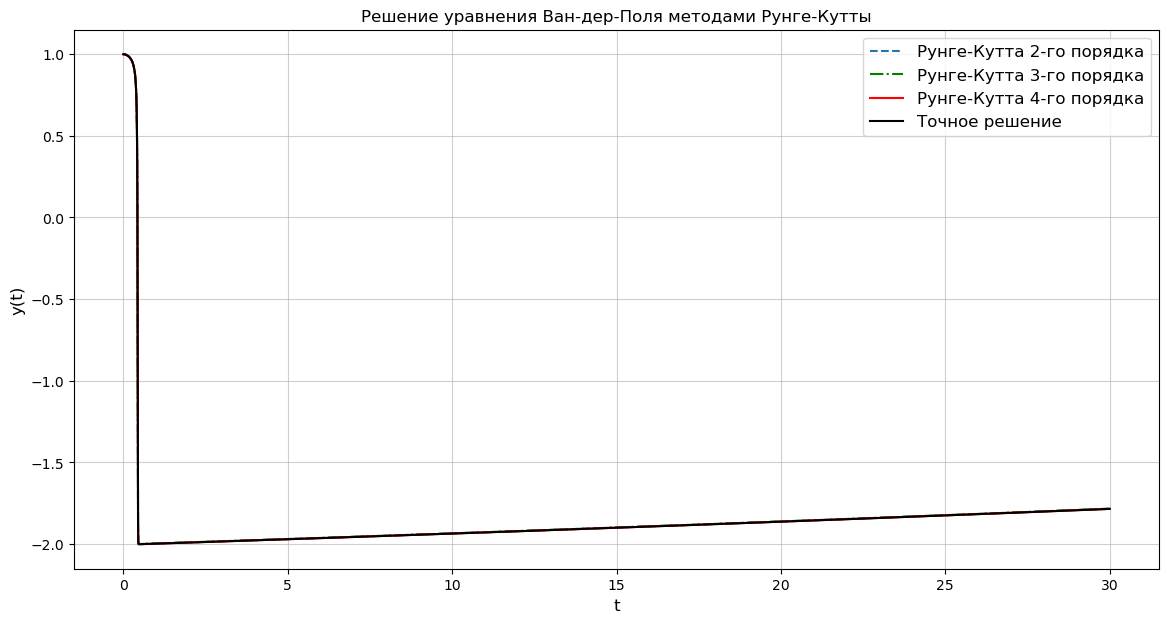

In [131]:
t_rk2, y_rk2 = runge_kutta_2(vdp_system, t0, y0, p0, h, t_end)
t_rk3, y_rk3 = runge_kutta_2(vdp_system, t0, y0, p0, h, t_end)
t_rk4, y_rk4 = runge_kutta_4(vdp_system, t0, y0, p0, h, t_end)
t_dp, y_dp, _ = dormand_prince_with_params(vdp_system, [t0, t_end],y0, p0, h, tol=1e-6)

plt.figure(figsize=(14, 7))
plt.plot(t_rk2, y_rk2, label="Рунге-Кутта 2-го порядка", linestyle="--")
plt.plot(t_rk3, y_rk3, label="Рунге-Кутта 3-го порядка", linestyle="-.", color='green')
plt.plot(t_rk4, y_rk4, label="Рунге-Кутта 4-го порядка", linestyle="-", color='red')
plt.plot(t_dp, y_dp[:, 0], label="Точное решение", color="black")
plt.title("Решение уравнения Ван-дер-Поля методами Рунге-Кутты")
plt.xlabel("t", fontsize=12)
plt.ylabel("y(t)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.6)
plt.show()

Данное значение $a=100$ является очень высоким и не позволяет увидеть картину колебаний на отрезке $t\in[0; 30]$. При этом все численные решения выглядят идеально совпадающими.

Уменьшим значение $a$ до 10 чтобы увидеть картину колебаний:

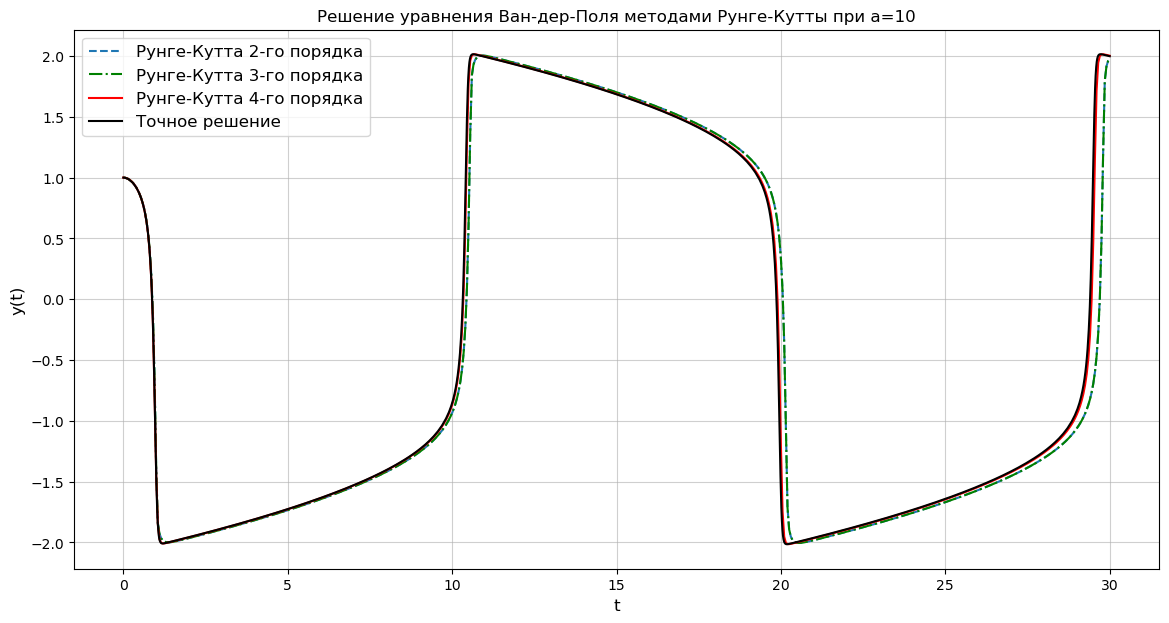

In [153]:
a=10
t_rk2, y_rk2 = runge_kutta_2(vdp_system, t0, y0, p0, h, t_end)
t_rk3, y_rk3 = runge_kutta_2(vdp_system, t0, y0, p0, h, t_end)
t_rk4, y_rk4 = runge_kutta_4(vdp_system, t0, y0, p0, h, t_end)
t_dp, y_dp, _ = dormand_prince_with_params(vdp_system, [t0, t_end],y0, p0, h, tol=1e-6)

plt.figure(figsize=(14, 7))
h=0.05
plt.plot(t_rk2, y_rk2, label="Рунге-Кутта 2-го порядка", linestyle="--")
plt.plot(t_rk3, y_rk3, label="Рунге-Кутта 3-го порядка", linestyle="dashdot", color='green')
plt.plot(t_rk4, y_rk4, label="Рунге-Кутта 4-го порядка", linestyle="-", color='red')
plt.plot(t_dp, y_dp[:, 0], label="Точное решение", color="black")
plt.title("Решение уравнения Ван-дер-Поля методами Рунге-Кутты при a=10")
plt.xlabel("t", fontsize=12)
plt.ylabel("y(t)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.6)
plt.show()

Полученное решение, как и предполагалось, выглядит как негармонические колебания c периодом $a$. При этом все численные решения очень точно приближают решение, взятое за эталон.

Изобразим зависимость погрешности от $t$ для методов разного порядка:

In [143]:
from scipy.interpolate import interp1d

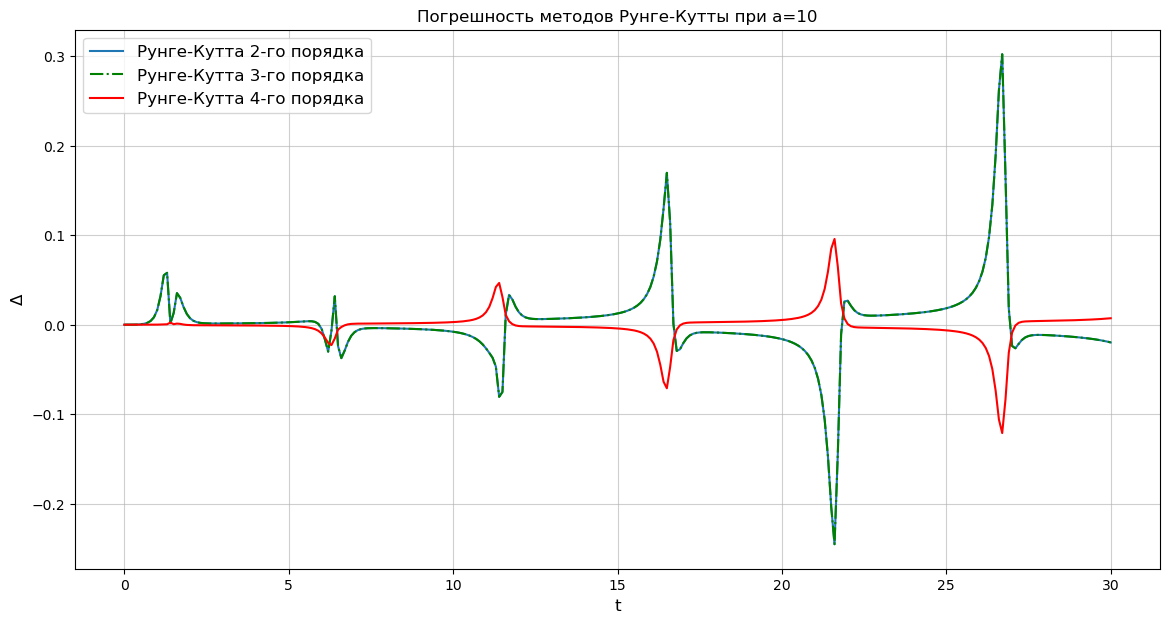

In [161]:
plt.figure(figsize=(14, 7))
h=0.05
interp_y = interp1d(t_dp, y_dp[:, 0], kind='cubic', fill_value="extrapolate")
plt.plot(t_rk2, (y_rk2-interp_y(t_rk2)), label="Рунге-Кутта 2-го порядка", linestyle="-")
plt.plot(t_rk3, (y_rk3-interp_y(t_rk3)), label="Рунге-Кутта 3-го порядка", linestyle="dashdot", color='green')
plt.plot(t_rk4, (y_rk4-interp_y(t_rk4)), label="Рунге-Кутта 4-го порядка", linestyle="-", color='red')
# plt.plot(t_dp, y_dp[:, 0], label="Точное решение", color="black")
plt.title("Погрешность методов Рунге-Кутты при a=10")
plt.xlabel("t", fontsize=12)
plt.ylabel("$\Delta$", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.6)
plt.show()

Попробуем отрисовать решения при $a<<1$, в этом случае исходное уравнение будет принимать вид:
$$
y'' + y=0
$$
Решениями котрого являются гармонические колебания. Убедимся, что наша реализация коррекктно работает в предельном случае:

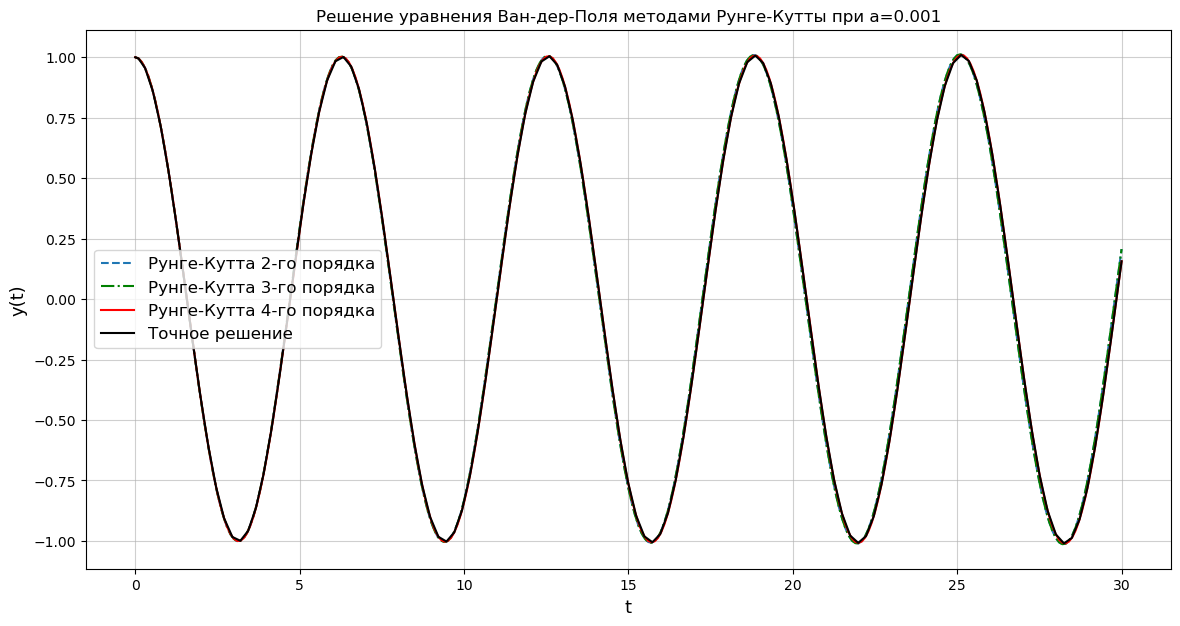

In [149]:
a=0.001
t_rk2, y_rk2 = runge_kutta_2(vdp_system, t0, y0, p0, h, t_end)
t_rk3, y_rk3 = runge_kutta_2(vdp_system, t0, y0, p0, h, t_end)
t_rk4, y_rk4 = runge_kutta_4(vdp_system, t0, y0, p0, h, t_end)
t_dp, y_dp, _ = dormand_prince_with_params(vdp_system, [t0, t_end],y0, p0, h, tol=1e-6)

plt.figure(figsize=(14, 7))
h=0.1
plt.plot(t_rk2, y_rk2, label="Рунге-Кутта 2-го порядка", linestyle="--")
plt.plot(t_rk3, y_rk3, label="Рунге-Кутта 3-го порядка", linestyle="dashdot", color='green')
plt.plot(t_rk4, y_rk4, label="Рунге-Кутта 4-го порядка", linestyle="-", color='red')
plt.plot(t_dp, y_dp[:, 0], label="Точное решение", color="black")
plt.title("Решение уравнения Ван-дер-Поля методами Рунге-Кутты при a=0.001")
plt.xlabel("t", fontsize=13)
plt.ylabel("y(t)", fontsize=13)
plt.legend(fontsize=12)
plt.grid(alpha=0.6)
plt.show()

Как и ожидалось, всё работает корректно и полученное решение является в точности косинусом, т.к. $y(0)= 1; ~~ y'(0)=0$ 

Дополнительно построим графики численных решений при разных значениях $a$:

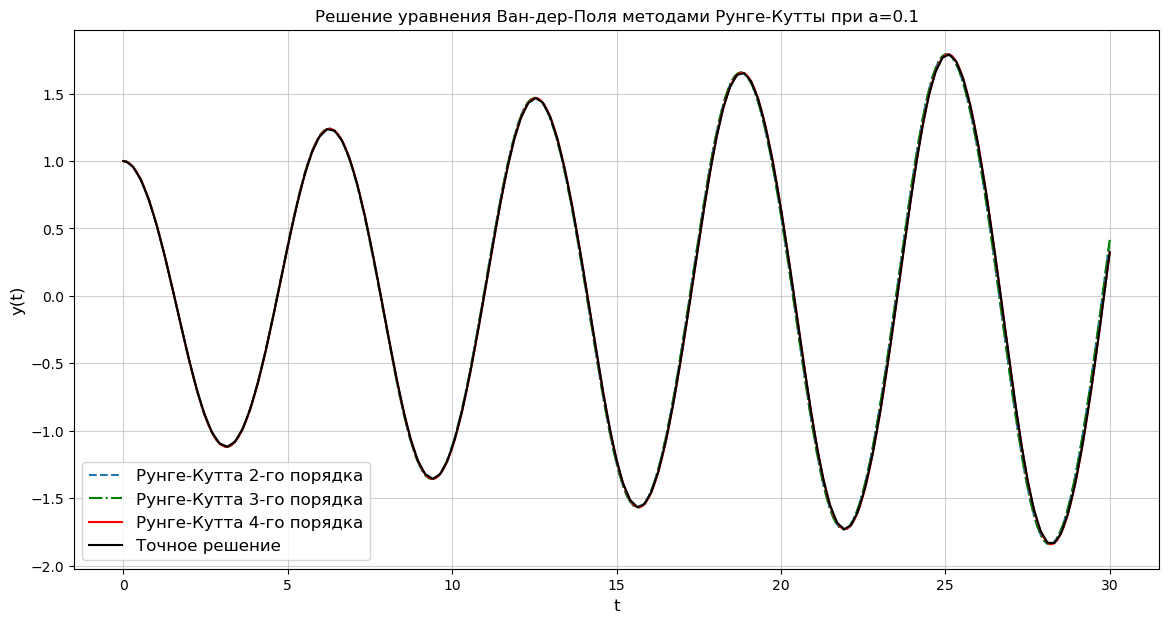

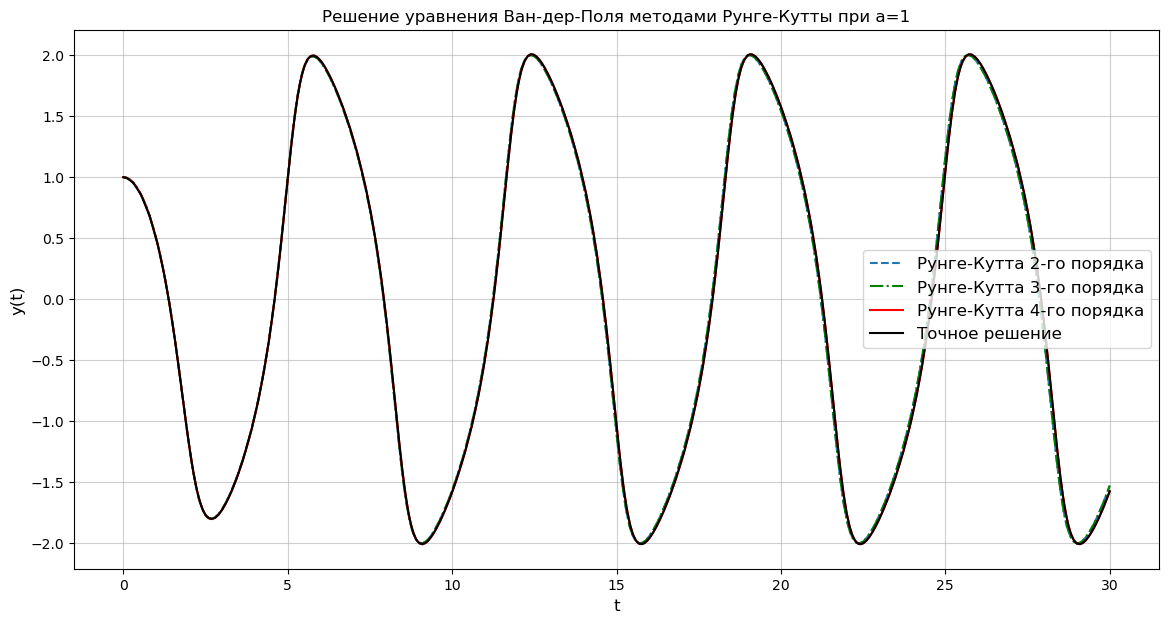

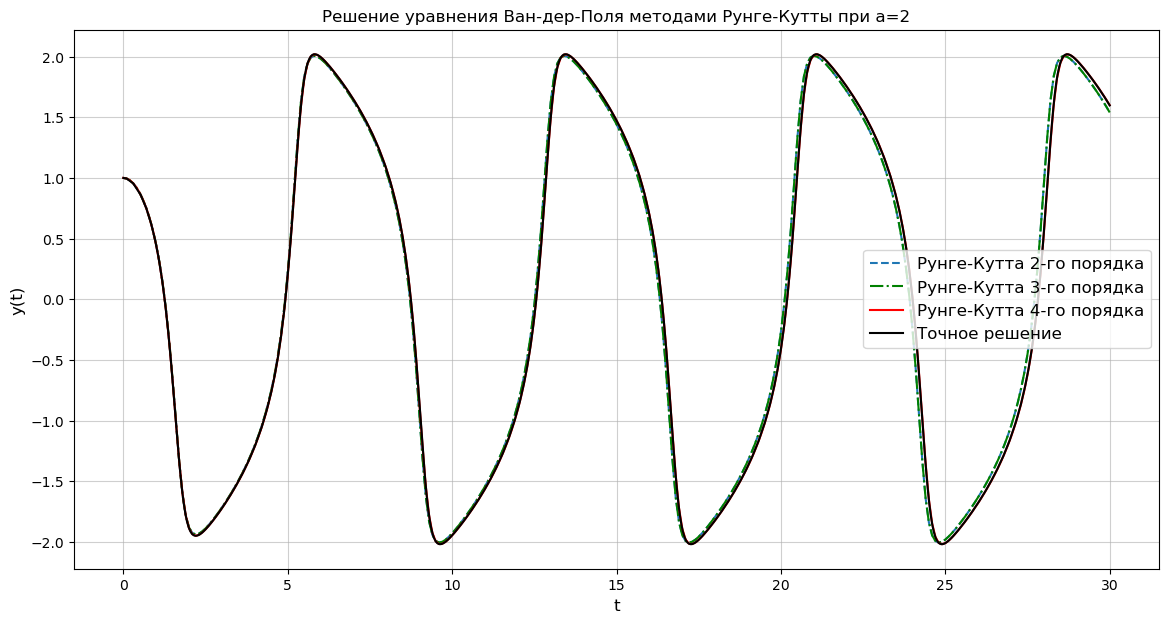

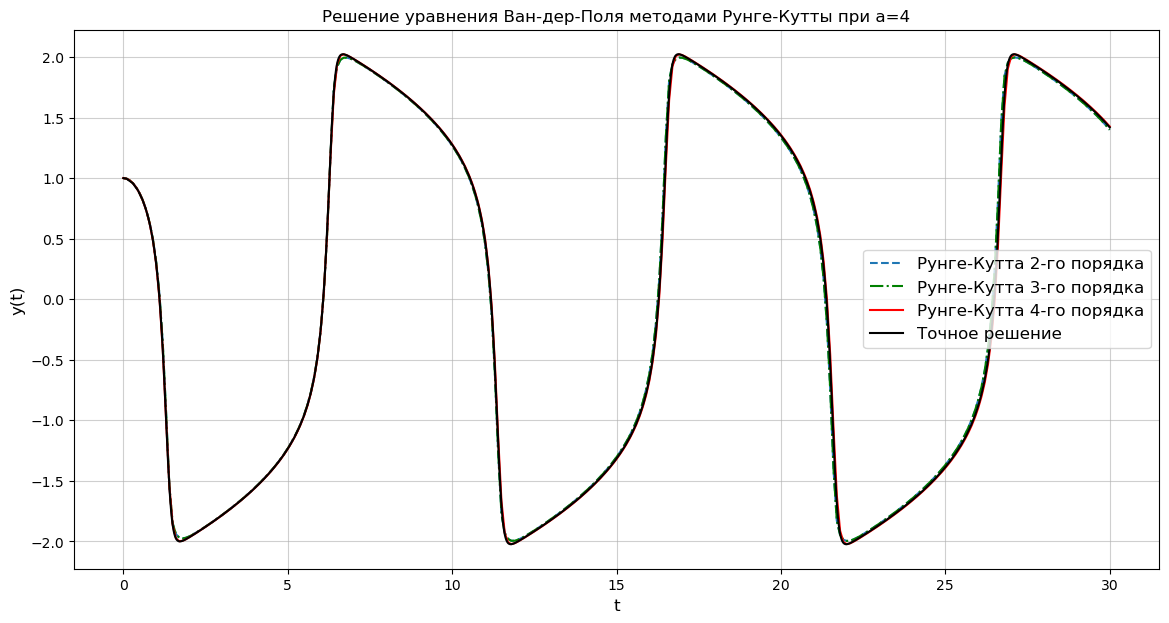

In [160]:
for a in [0.1, 1, 2, 4]:
    t_rk2, y_rk2 = runge_kutta_2(vdp_system, t0, y0, p0, h, t_end)
    t_rk3, y_rk3 = runge_kutta_2(vdp_system, t0, y0, p0, h, t_end)
    t_rk4, y_rk4 = runge_kutta_4(vdp_system, t0, y0, p0, h, t_end)
    t_dp, y_dp, _ = dormand_prince_with_params(vdp_system, [t0, t_end],y0, p0, h, tol=1e-6)

    plt.figure(figsize=(14, 7))
    h=0.1
    plt.plot(t_rk2, y_rk2, label="Рунге-Кутта 2-го порядка", linestyle="--")
    plt.plot(t_rk3, y_rk3, label="Рунге-Кутта 3-го порядка", linestyle="dashdot", color='green')
    plt.plot(t_rk4, y_rk4, label="Рунге-Кутта 4-го порядка", linestyle="-", color='red')
    plt.plot(t_dp, y_dp[:, 0], label="Точное решение", color="black")
    plt.title(f"Решение уравнения Ван-дер-Поля методами Рунге-Кутты при a={a}")
    plt.xlabel("t", fontsize=12)
    plt.ylabel("y(t)", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6)
    plt.show()

**Таким образом в данной задаче мы построили численное решение уравнения Ван-дер-Поля явными методами Рунге-Кутты. Полученные решения очень хорошо приближают эталонное и представляют собой ангармонические колебания, как и ожидалось из условий задачи.**

## Задача № 3. 
### Особые точки и особые траектории. Модель свертывания крови. Система ОДУ, описывающая динамику образования основных метаболитов в реакции свертывания крови

$$
\begin{cases}
    \frac{\partial u_1}{\partial t} & = K_1 u_1 u_2 (1 - u_1)\cdot \frac{1 + K_2 u_1}{1 + K_3u_3} - u_1\\ 
    \frac{\partial u_2}{\partial t} & = u_1 - K_4 u_2 \\ 
    \frac{\partial u_3}{\partial t} & = K_5 u_1^2 - K_6 u_3 
\end{cases}
$$

Значения коэффициентов $K_1,...K_5$ нам заданы по условию:

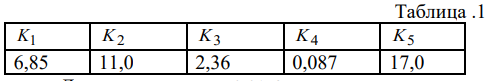


### Численное решение:

Для начала, импортируем необходимые библиотеки и запишем параметры системы:

In [205]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Параметры
K1 = 6.85
K2 = 11.0
K3 = 2.36
K4 = 0.087
K5 = 17.0


Запишем систему уравнений. В качестве начальных условий возьмём точку $u_0 = (0.1; 0.1; 0.1)$

In [241]:
def system(t, u, K6):
    u1, u2, u3 = u
    du1dt = K1 * u1 * u2 * (1 - u1)*(1 + K2*u1)/(1+K3*u3) - u1
    du2dt = u1 - K4*u2
    du3dt = K5*u1**2 - K6 * u3
    return [du1dt, du2dt, du3dt]

# Начальные условия
u0 = [0.1, 0.1, 0.1]  

Решим данную систему численно, используя метод Рунге-Кутты 4 порядка. Будем решать, варьируя значения параметра $K_6\in[0; 0.2]$ на отрезке $t\in[0;100]$ при фиксированом $K_2$. 

Полученные решения проиллюстрируем графически на плоскости: $(u_1, u_2)$

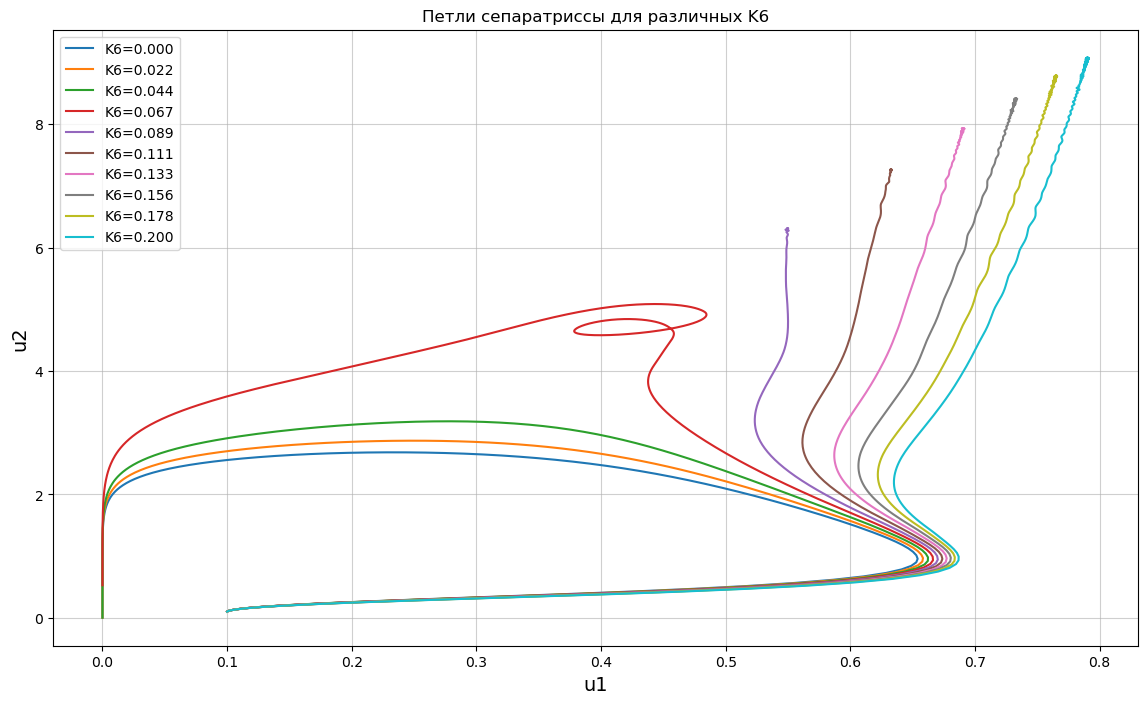

In [ ]:
K6_values = np.linspace(0, 0.2, 10)

results = []

# Численное решение для разных K6
for K6 in K6_values:
    sol = solve_ivp(system, [0, 100],t_eval=np.linspace(0, 100, 1000), y0=u0, args=(K6,), dense_output=True)
    results.append(sol)
plt.figure(figsize=(14,8))
# Визуализация
for idx, result in enumerate(results):
    plt.plot(result.y[0], result.y[1], label=f'K6={K6_values[idx]:.3f}')

plt.xlabel('u1', fontsize=14)
plt.ylabel('u2', fontsize=14)
plt.title('Петли сепаратриссы для различных K6')
plt.grid(alpha=0.6)
plt.legend()
plt.show()


По данному графику понятно наличие предельной точки $(0;0)$, куда приходят первые 3 траектории при малых значениях $K_6$

Рассмотрим полученные траектории в более узком диапазоне $K_6$ вблизи бифуркации Хопфа ($K_6 = 0.0692$), увеличим отрезок до $t\in[0; 1000]$

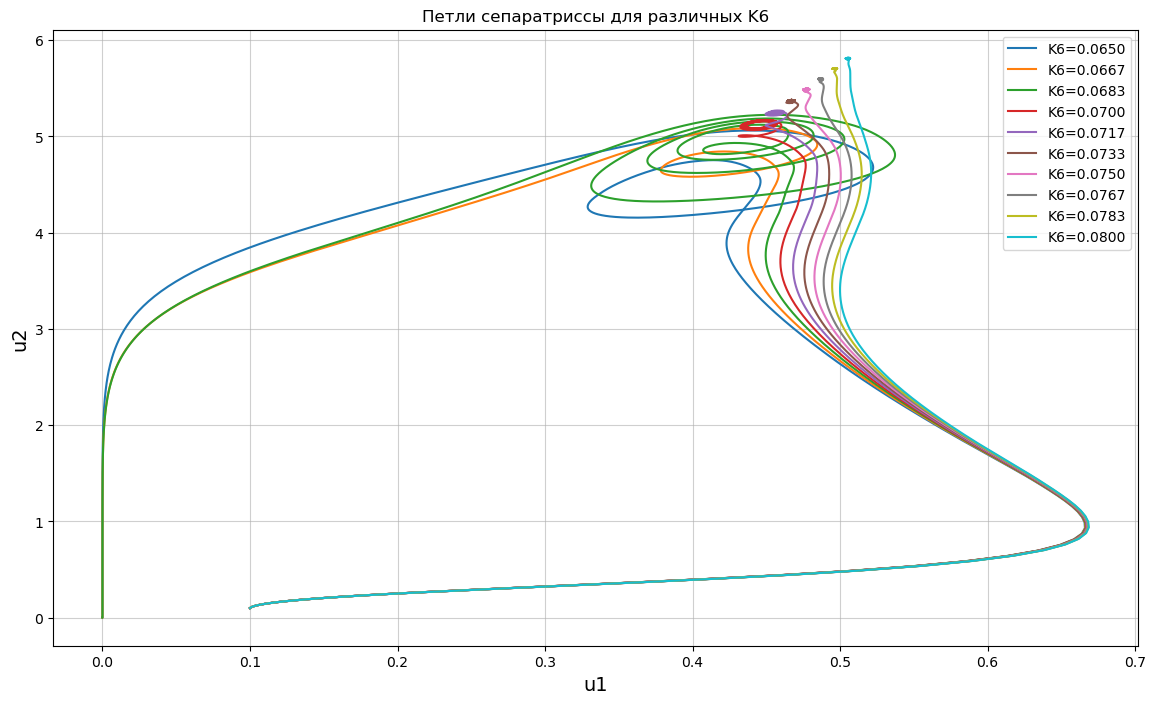

In [264]:
K6_values = np.linspace(0.065, 0.08, 10)

results = []

# Численное решение для разных K6
for K6 in K6_values:
    sol = solve_ivp(system, [0, 1000],t_eval=np.linspace(0, 1000, 10000), y0=u0, args=(K6,), dense_output=True)
    results.append(sol)
plt.figure(figsize=(14,8))
# Визуализация
for idx, result in enumerate(results):
    plt.plot(result.y[0], result.y[1], label=f'K6={K6_values[idx]:.4f}')

plt.xlabel('u1', fontsize=14)
plt.ylabel('u2', fontsize=14)
plt.title('Петли сепаратриссы для различных K6')
plt.grid(alpha=0.6)
plt.legend()
plt.show()


Отдельно решим систему при почти точном "бифуркационном" значении параметра $K_6$

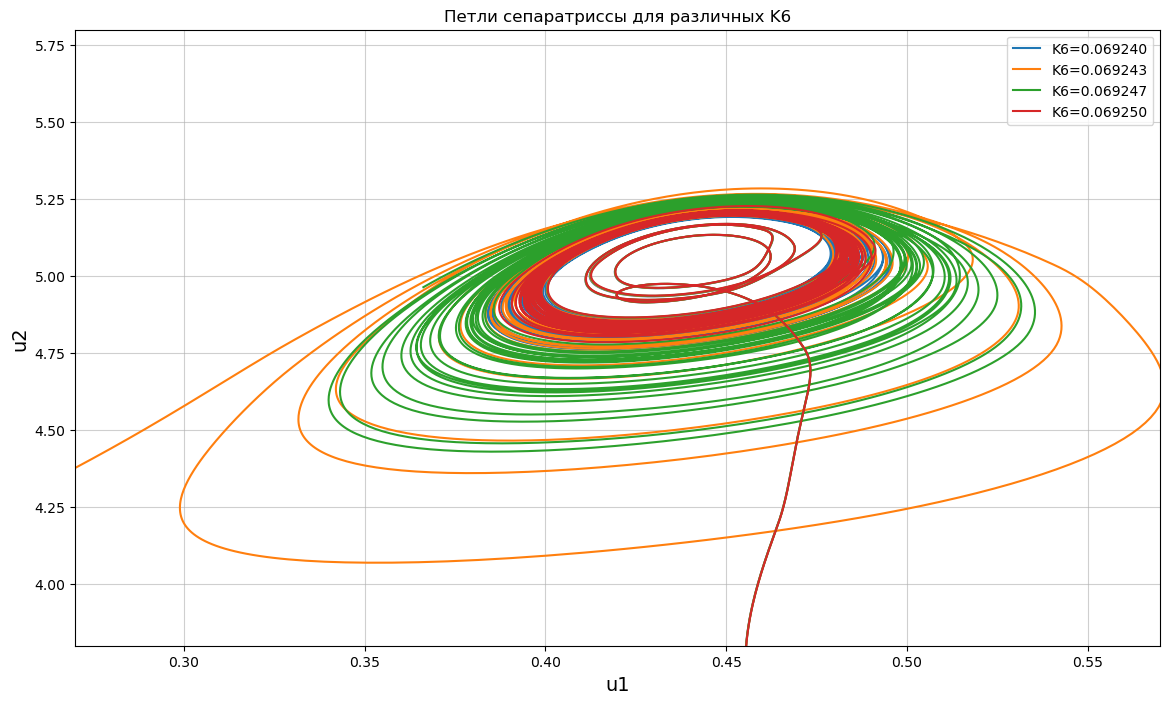

In [270]:
K6_values = np.linspace(0.06924, 0.06925, 4)

results = []

# Численное решение для разных K6
for K6 in K6_values:
    sol = solve_ivp(system, [0, 1000],t_eval=np.linspace(0, 1000, 10000), y0=u0, args=(K6,), dense_output=True)
    results.append(sol)
plt.figure(figsize=(14,8))
# Визуализация
for idx, result in enumerate(results):
    plt.plot(result.y[0], result.y[1], label=f'K6={K6_values[idx]:.6f}')

plt.xlabel('u1', fontsize=14)
plt.ylabel('u2', fontsize=14)
plt.title('Петли сепаратриссы для различных K6')
plt.xlim(0.27, 0.57)
plt.ylim(3.8, 5.8)
plt.grid(alpha=0.6)
plt.legend()
plt.show()


По полученным гарфикам решений можно наблюдать рождение предельного цикла из петли сепаратрисы в окрестности $(u_{1s}, u_{2s}) = (0.44, 5.09)$, таким образом данная точка становится устойчивой при $K_2 = 11.0, ~~~ K6>0.06924$

К сожалению, я не успел проделать все необходимые в данной задаче вычисления и довести её до конца, однако она показалась мне очень красивой.